# EDA

Imports all the libraries necessary.

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

sns.set_style(style = 'whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Reads in the pickle with the clean `train` data from the `01_Data_Cleaning` notebook.

In [3]:
train = pickle.load(open("../pickles/train_clean.pkl", "rb"))

In [24]:
train.head(1)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_other,bed_bath_ratio,overall_cond_bed_bath,garage_qual_cars
0,109,533352170,60,RL,0.0,13517,Pave,None,IR1,Lvl,...,0,1,0,0,0,0,0,1.5,12.0,6.0


In [5]:
train.isnull().sum().sum()

0

Since I dont like the way `train.columns` outputs the columns, I am using this loop to make columns a list.

In [6]:
# Create list with all cols
cols = []
for i in train.columns:
    cols.append(i)

Make a list called `important` that includes numeric values that I will investigate correlations for.

In [7]:
important = ['lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'exter_qual', 
        'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 
        'bsmtfin_sf_2','bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 
        'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond']

## Distributions, Scatter Plots, and Correlations

### Sale Price Distribution With & Without Outliers

Housing affordability is a selling point of Ames, Iowa. The housing sale price distribution makes Ames, Iowa a desireable market to move to or take business to. What does distribution look like with and without outliers?

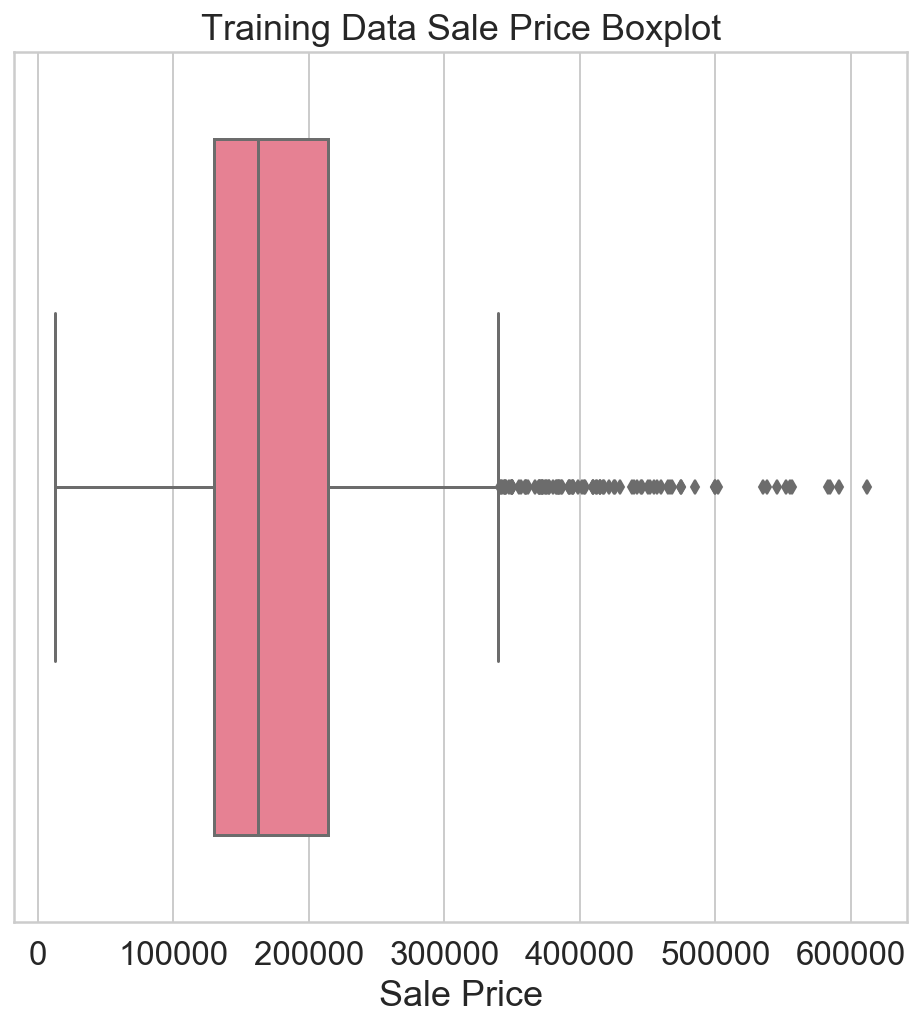

In [30]:
# Sale price distribution
sns.set(style='whitegrid', font_scale = 1.5, rc={"figure.figsize": (8,8)})
sns.boxplot(train['saleprice'], palette='husl')
plt.title('Training Data Sale Price Boxplot')
plt.xlabel('Sale Price')
plt.show()


Removes outliers and graph box plot without outliers.

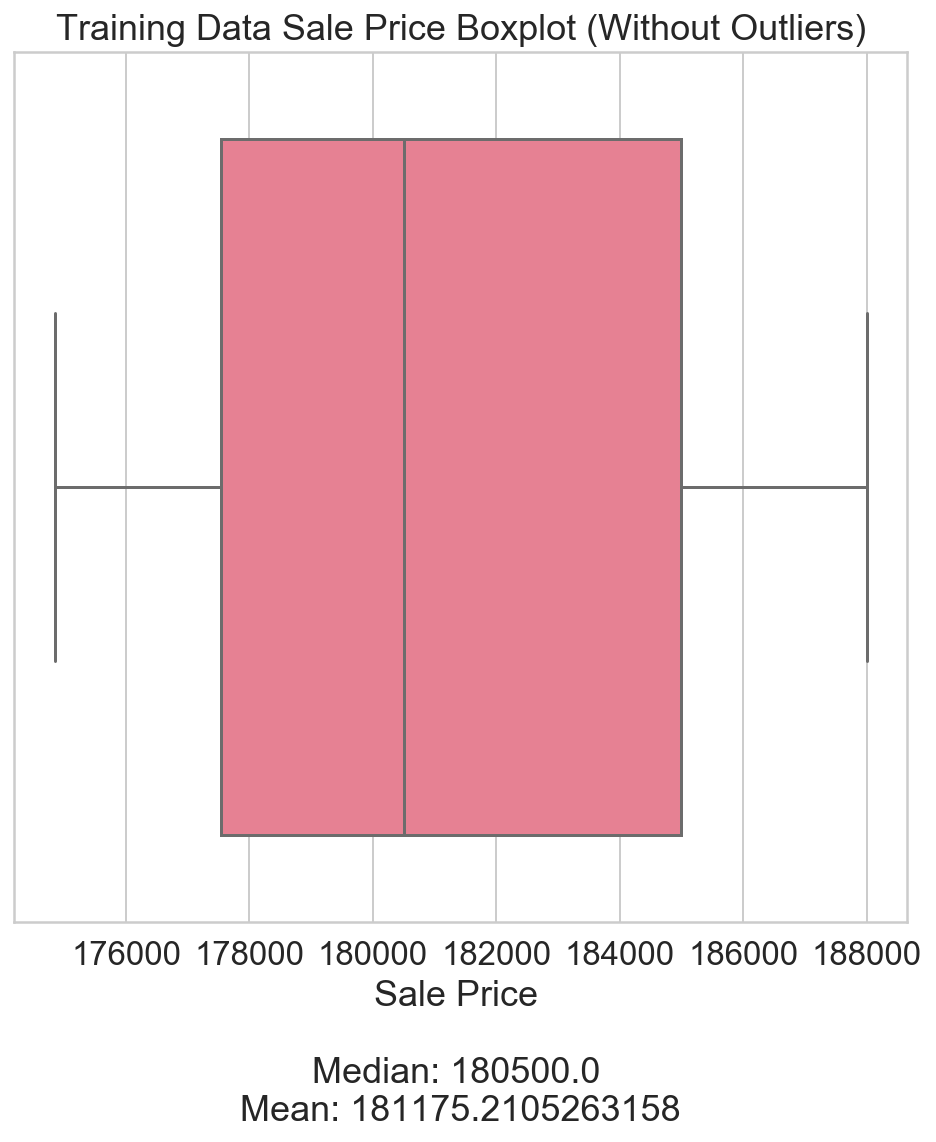

In [23]:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
train_1 = train[((train['saleprice'] - train['saleprice'].mean()) / train['saleprice'].std()).abs() < .085]
# Isolate mean and median to include in graph
sale_median = train_1['saleprice'].describe().iloc[5]
sale_mean = train_1['saleprice'].mean()

# Make box plot without outliers
sns.set(style='whitegrid', font_scale = 1.5, rc={"figure.figsize": (8,8)})
sns.boxplot(train_1['saleprice'], palette='husl')
plt.title('Training Data Sale Price Boxplot (Without Outliers)')
plt.xlabel(f'Sale Price \n\nMedian: {sale_median} \nMean: {sale_mean}')
plt.show()

### Histograms

Displays histograms subplots for numerical columns to analyze each columns distribution. 

In [8]:
# Originally used this in project 1
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10,10), dpi = 90) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    colors = ['#7F7FFF', '#FCBFB8', '#7F7FFF', '#FCBFB8']
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color = colors[i]) # feel free to add more settings
        # Set titles, labels, etc for each subplot
    for i, title in enumerate(list_of_titles):
        ax[i].set(title=title)
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set(xlabel=xlabel)
    plt.subplots_adjust(hspace=0.3)

>Defines a function which creates a subplot of histograms for numereical inputs.

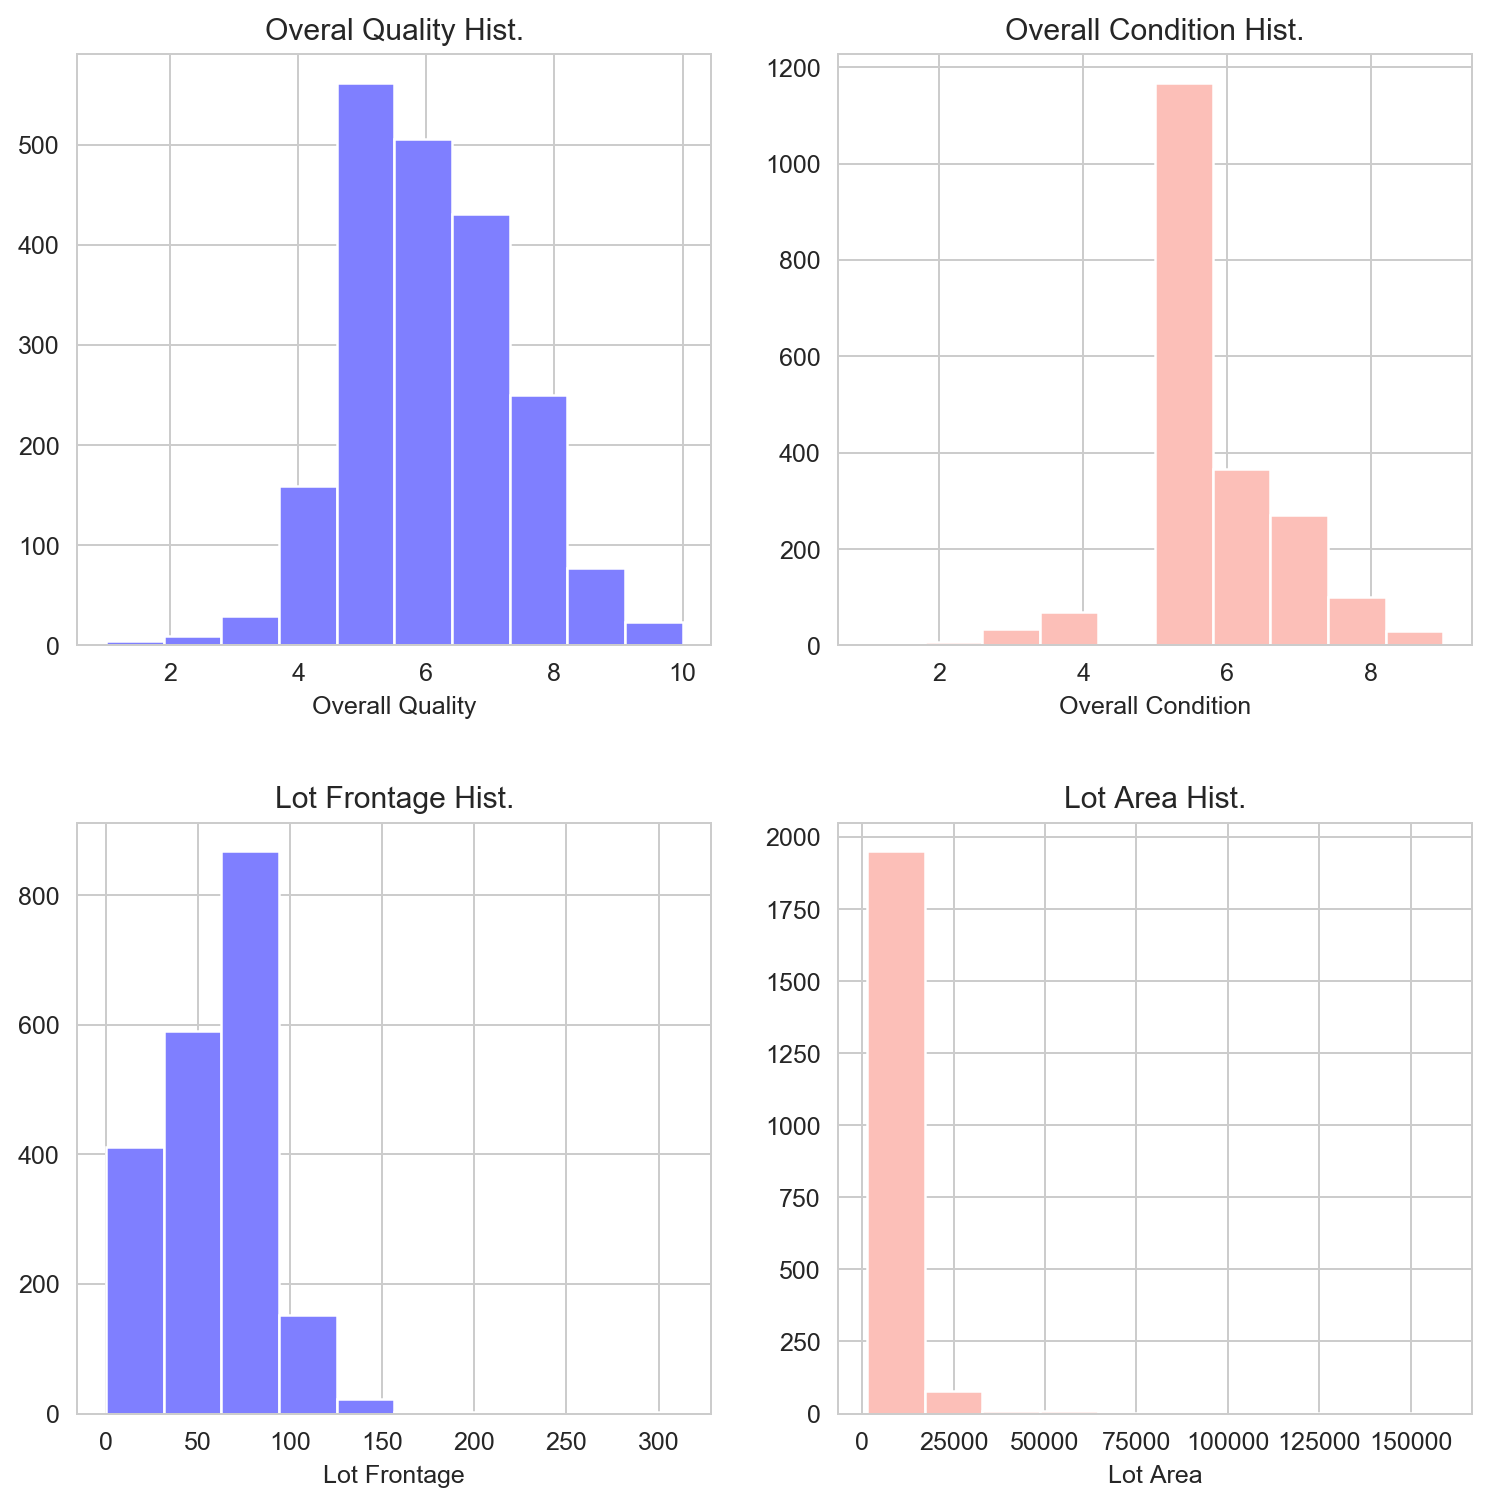

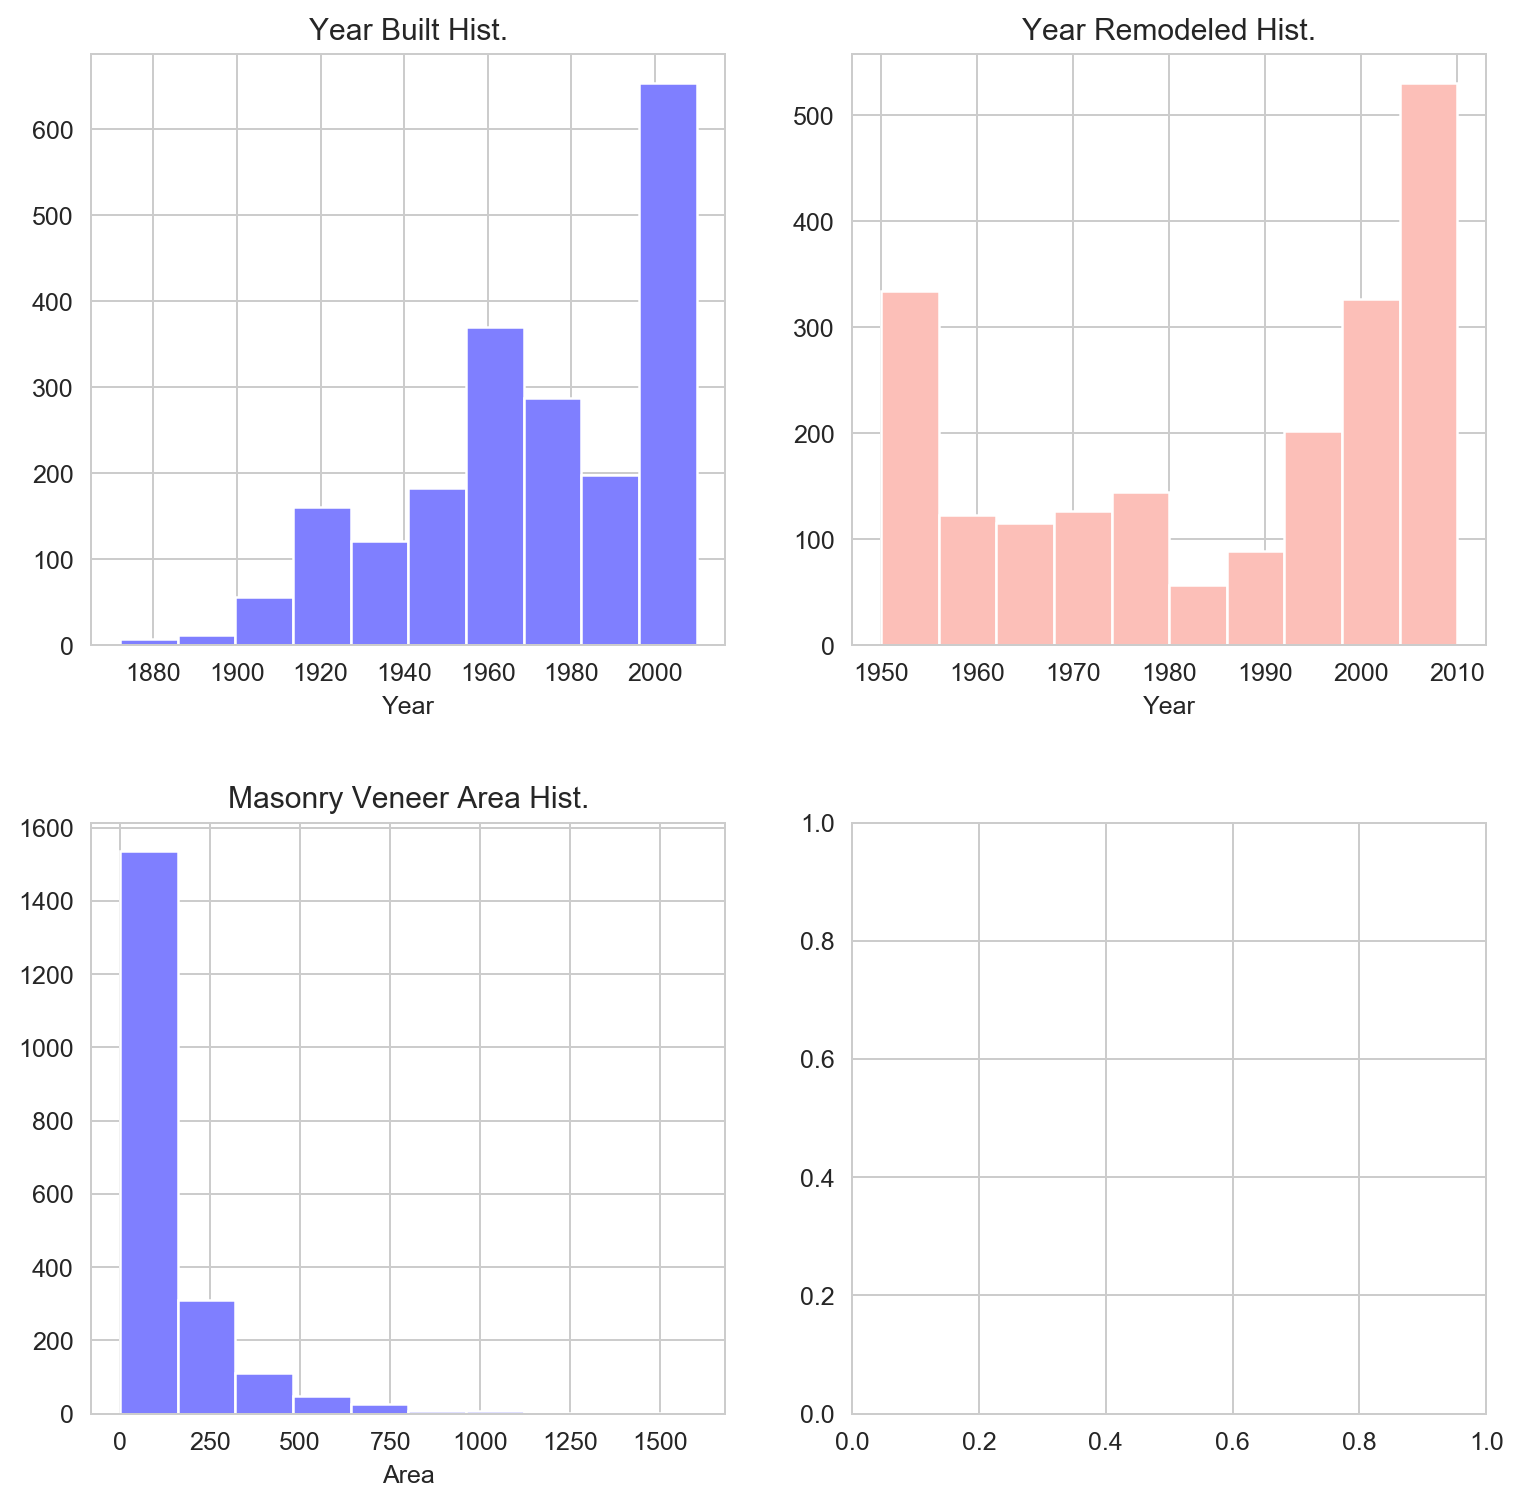

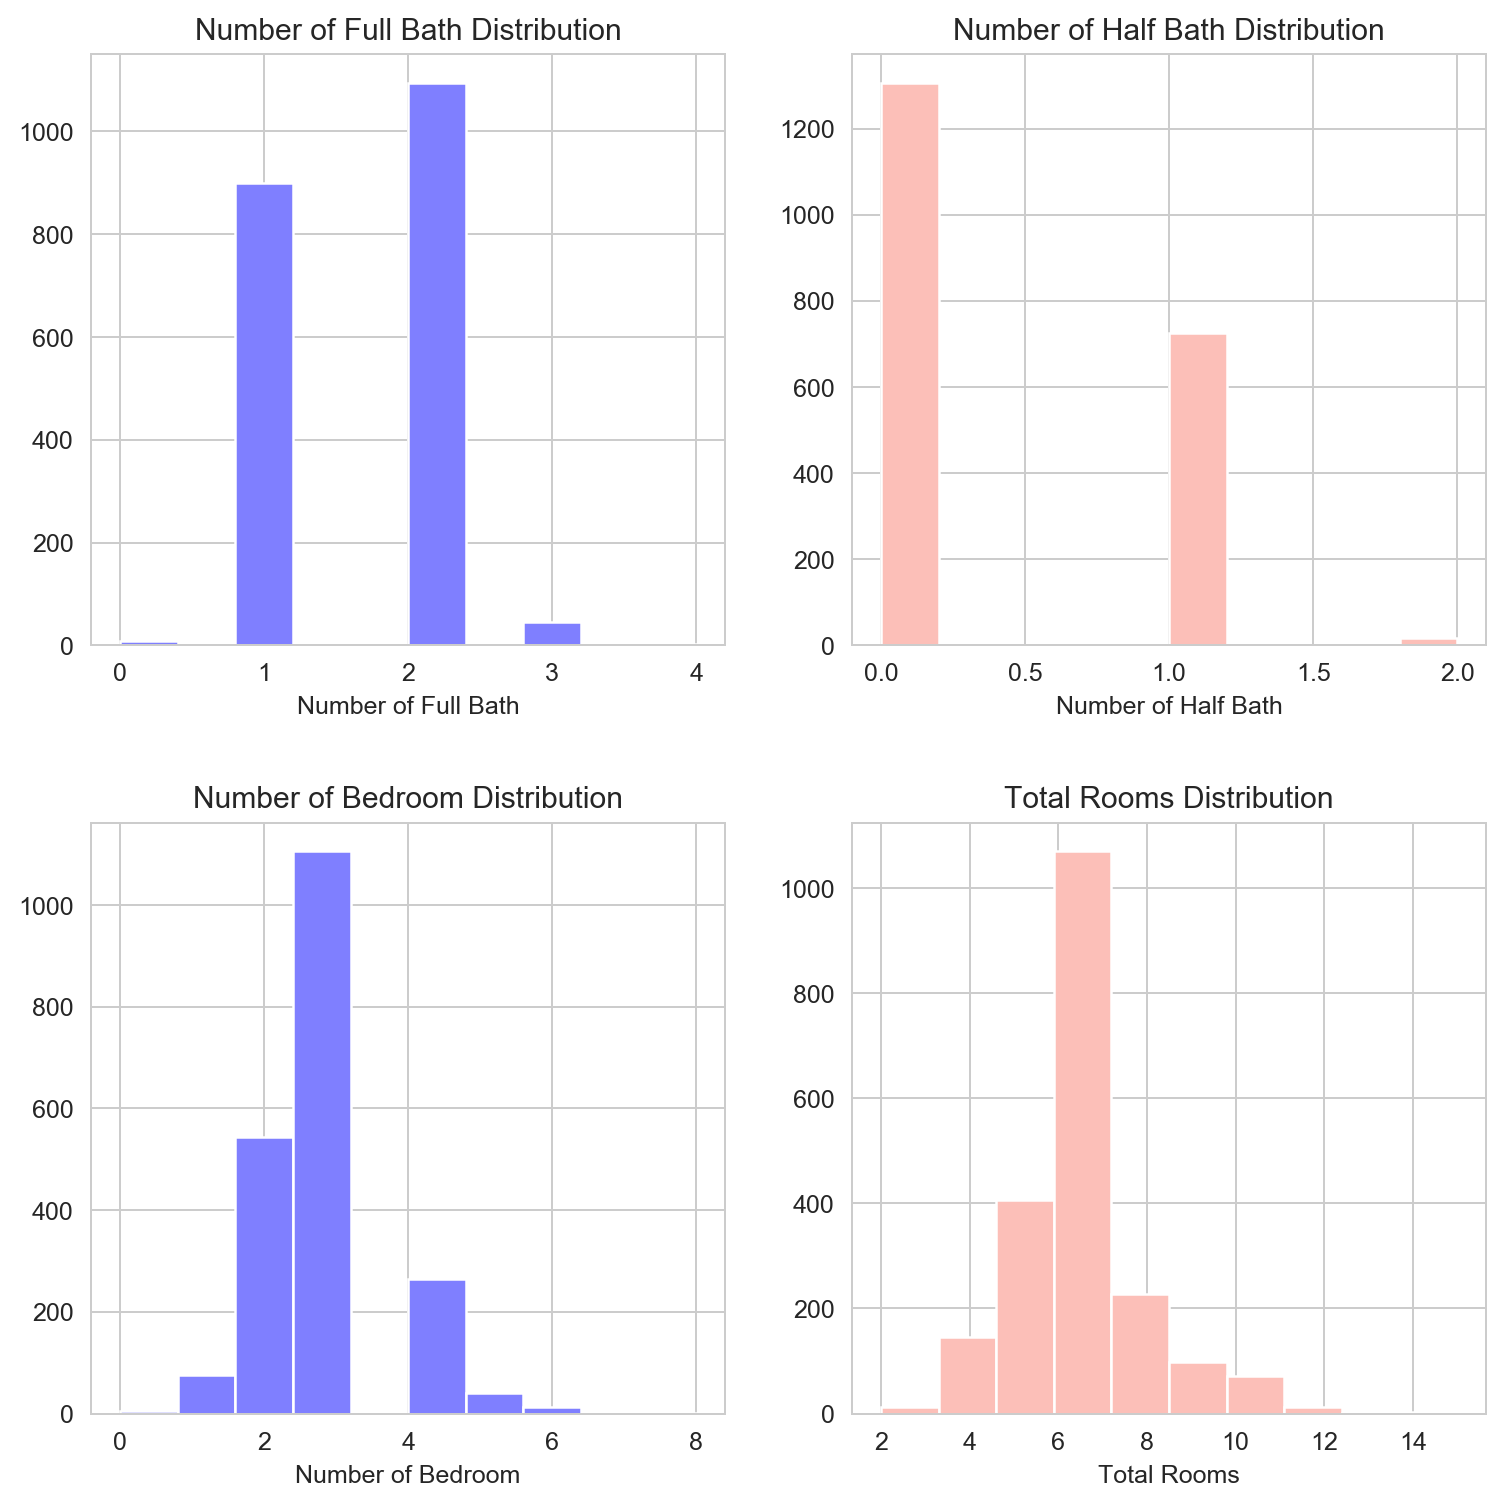

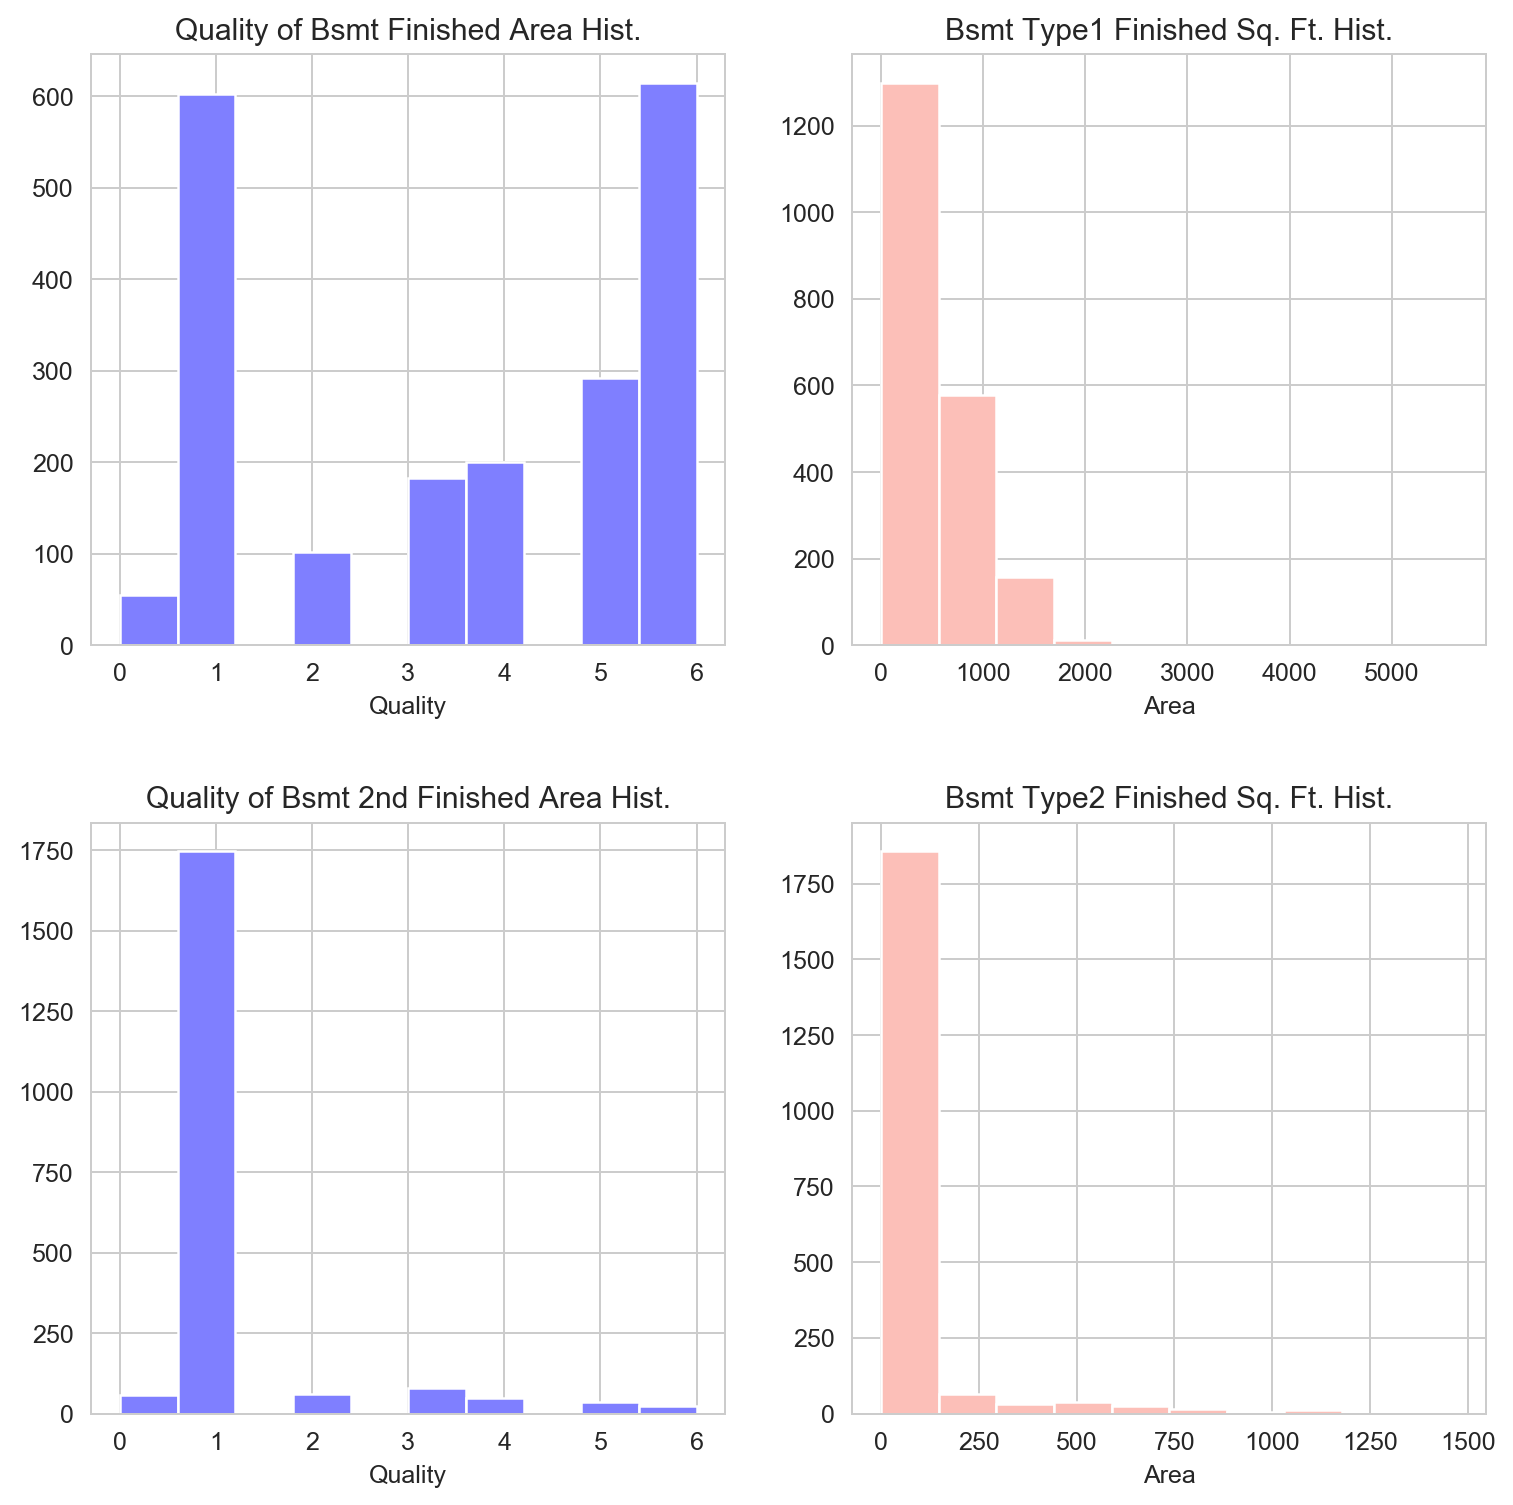

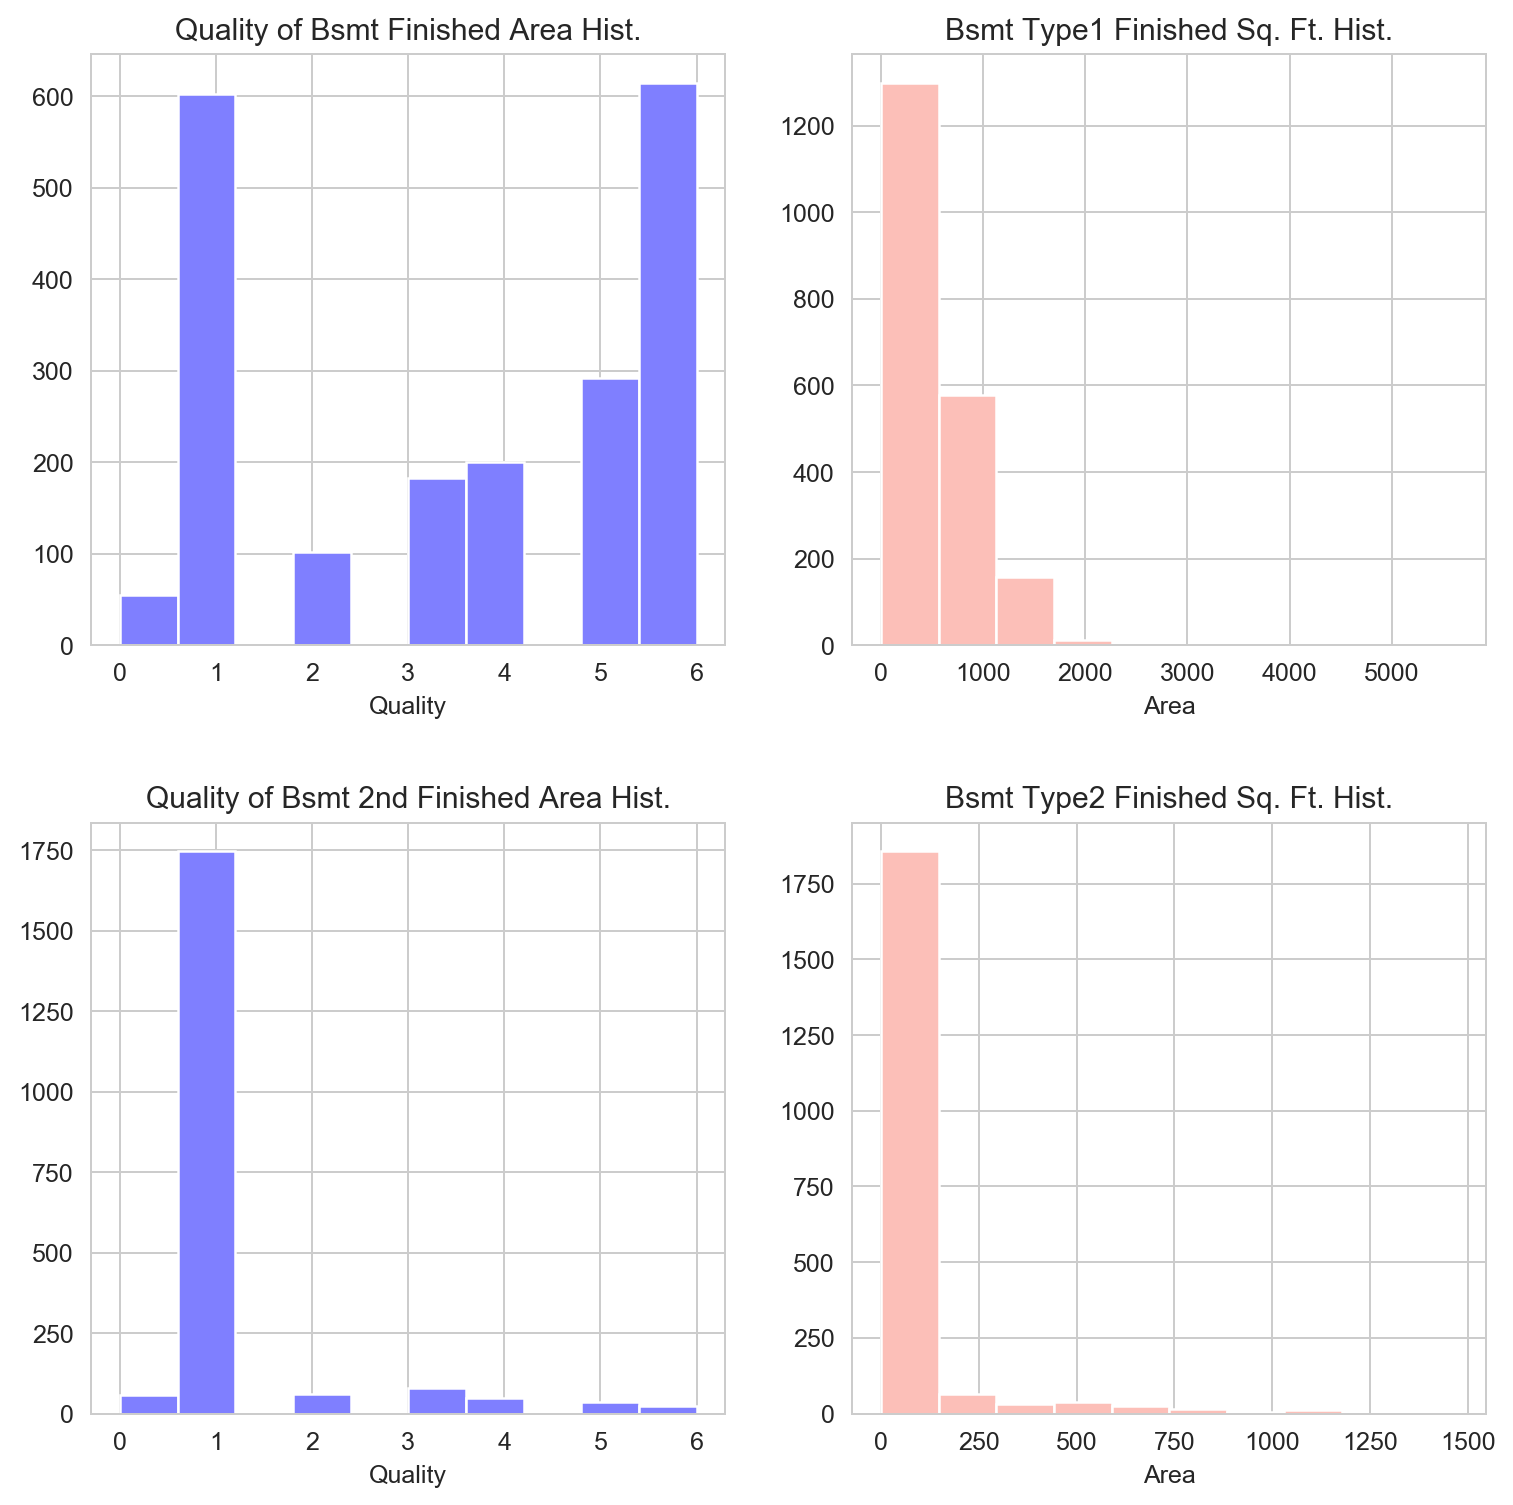

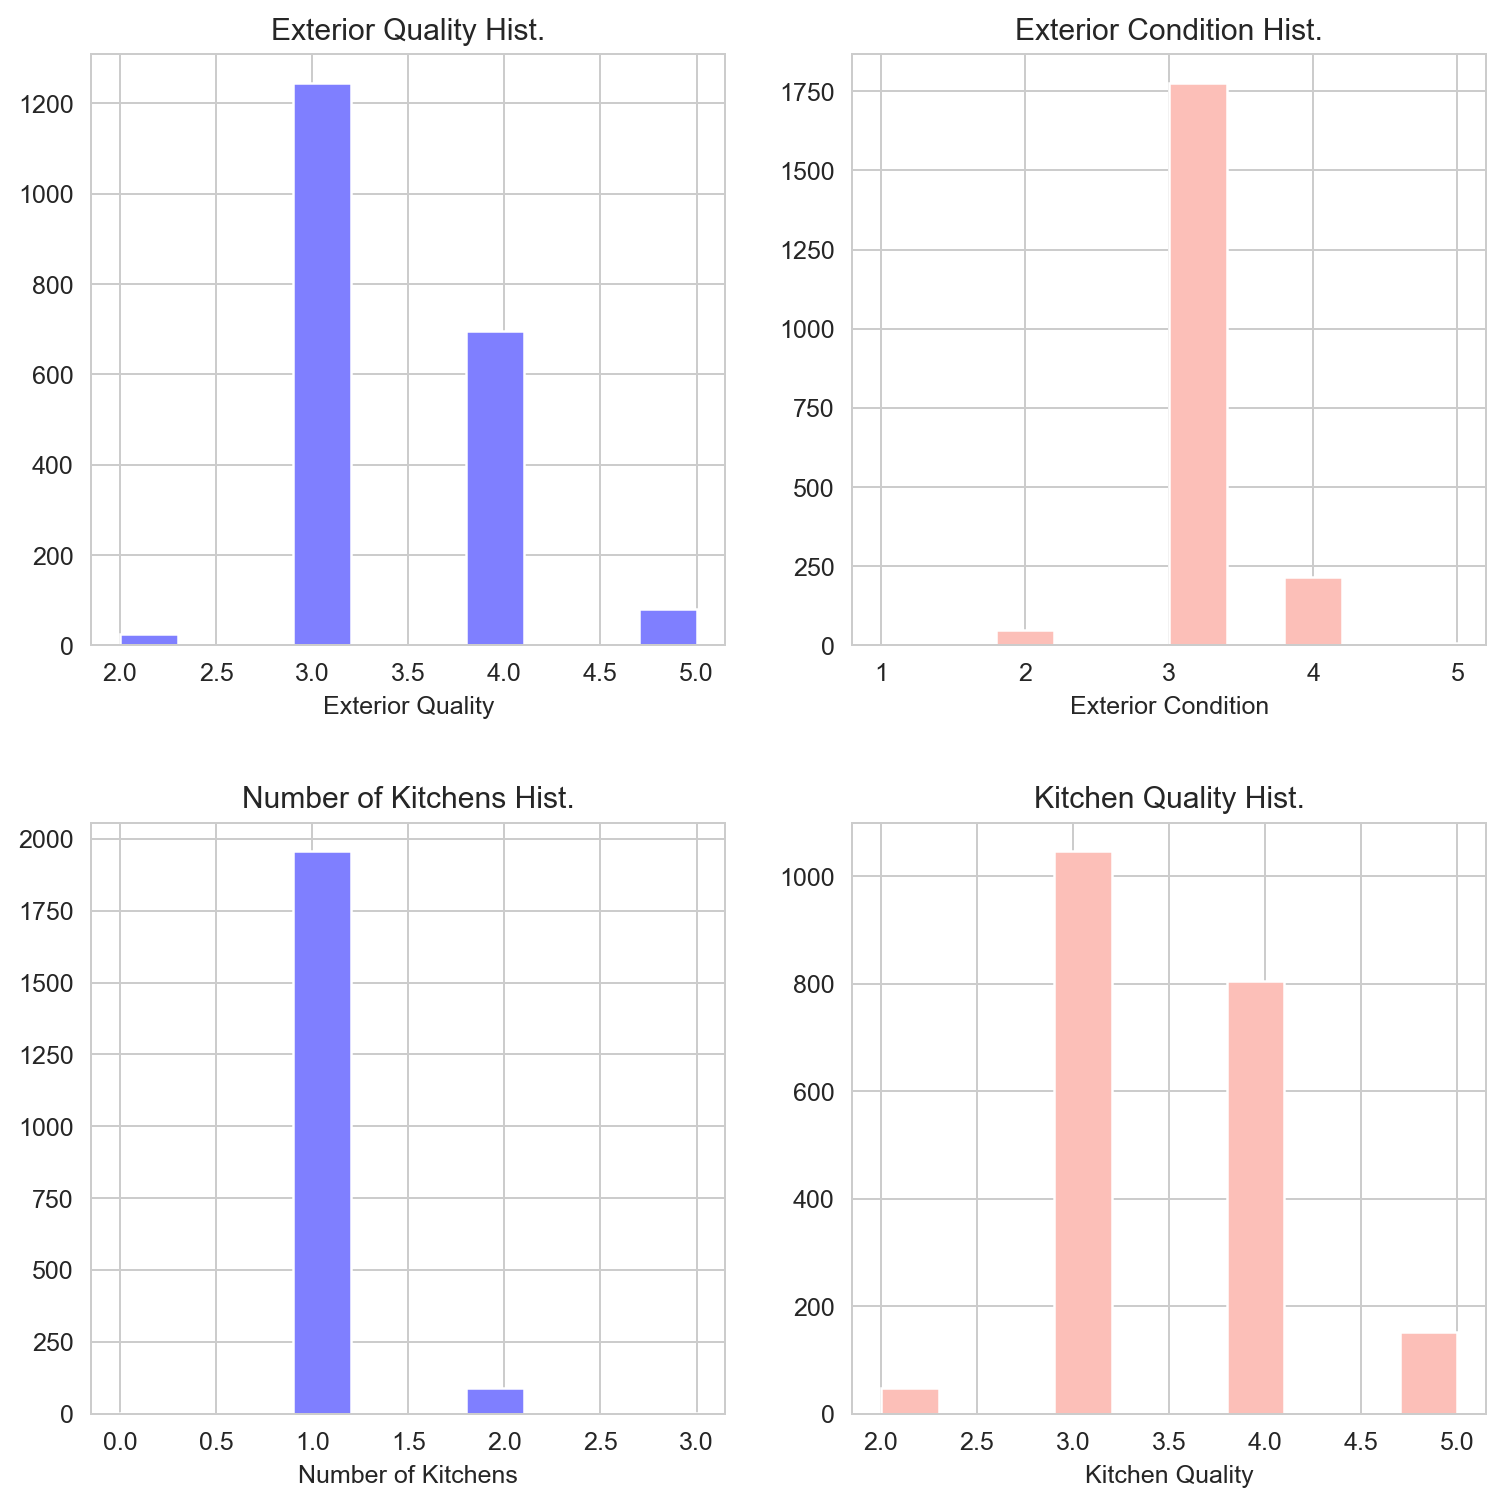

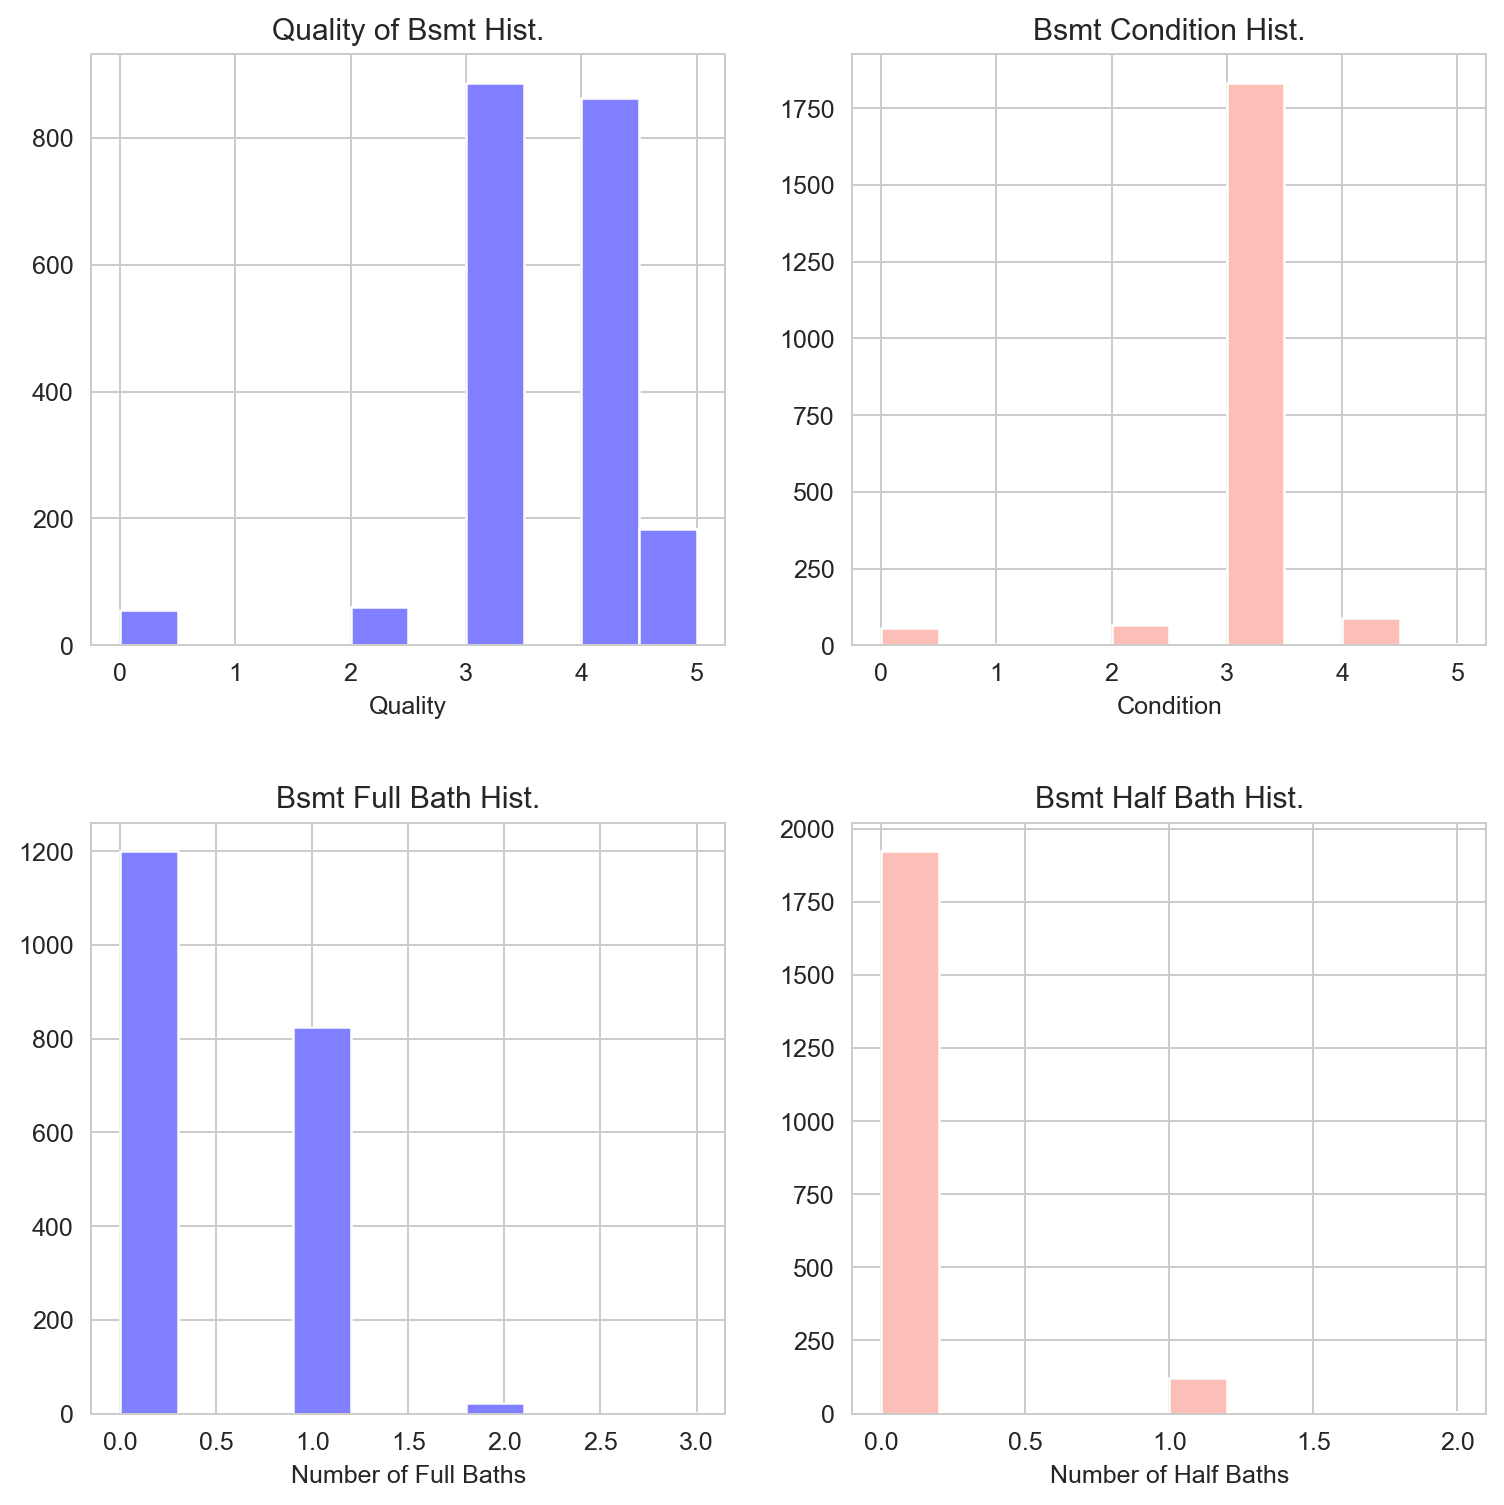

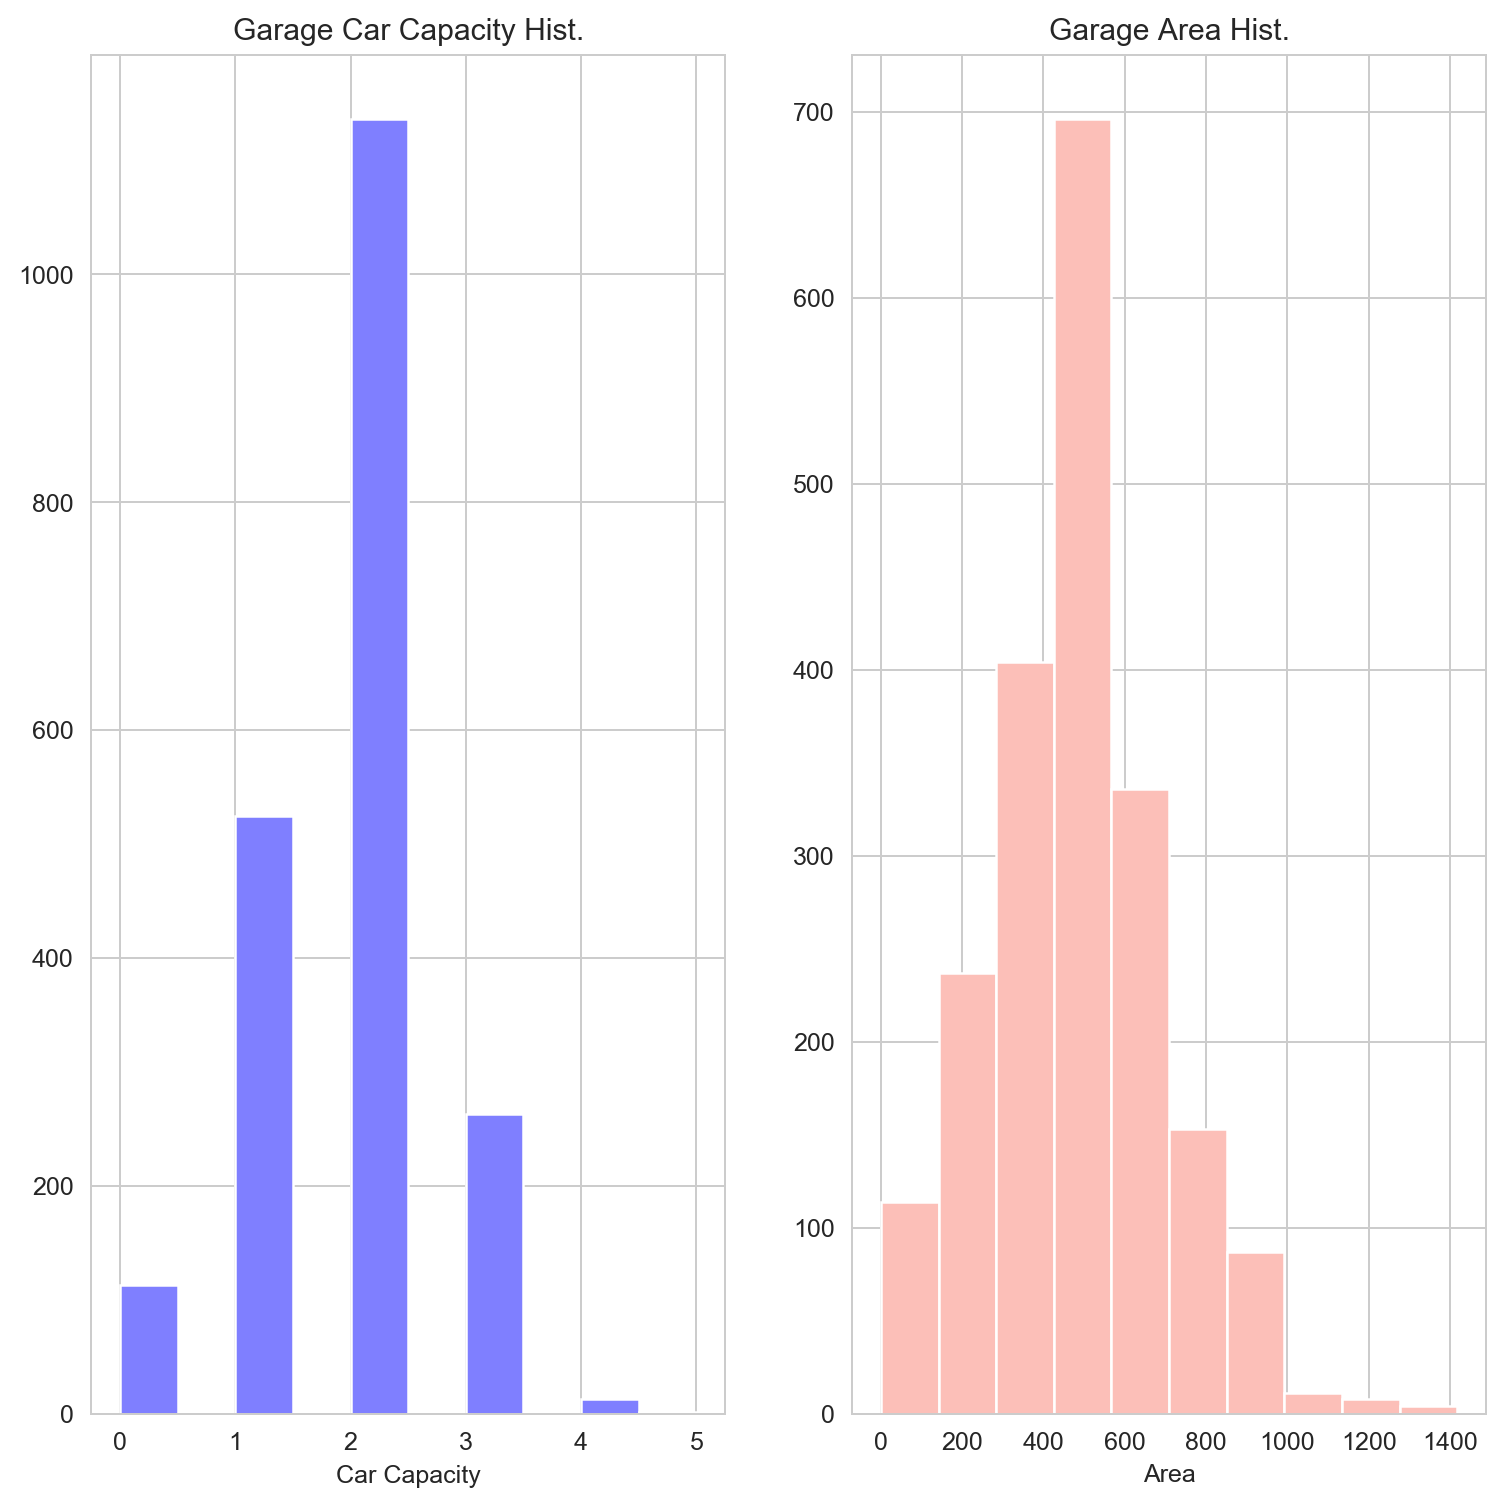

In [9]:
subplot_histograms(train, ['overall_qual', 'overall_cond', 'lot_frontage', 'lot_area'], 
                   ['Overall Quality Hist.', 'Overall Condition Hist.', 'Lot Frontage Hist.', 'Lot Area Hist.'], 
                   ['Overall Quality', 'Overall Condition', 'Lot Frontage', 'Lot Area'])
plt.savefig('../images/hist1.png');
plt.show()


subplot_histograms(train, ['year_built', 'year_remod/add', 'mas_vnr_area'], 
                   ['Year Built Hist.', 'Year Remodeled Hist.', 'Masonry Veneer Area Hist.'], 
                   ['Year', 'Year', 'Area'])
plt.savefig('../images/hist2.png');
plt.show()

subplot_histograms(train, ['full_bath', 'half_bath', 'bedroom_abvgr', 'totrms_abvgrd',], 
                   ['Number of Full Bath Distribution', 'Number of Half Bath Distribution', 'Number of Bedroom Distribution', 'Total Rooms Distribution'], 
                   ['Number of Full Bath', 'Number of Half Bath', 'Number of Bedroom', 'Total Rooms'])
plt.savefig('../images/hist3.png');
plt.show()

subplot_histograms(train, [ 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',], 
                   ['Quality of Bsmt Finished Area Hist.', 'Bsmt Type1 Finished Sq. Ft. Hist.', 'Quality of Bsmt 2nd Finished Area Hist.', 'Bsmt Type2 Finished Sq. Ft. Hist.'], 
                   ['Quality', 'Area', 'Quality', 'Area'])

plt.savefig('../images/hist4.png');
plt.show()

subplot_histograms(train, [ 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',], 
                   ['Quality of Bsmt Finished Area Hist.', 'Bsmt Type1 Finished Sq. Ft. Hist.', 'Quality of Bsmt 2nd Finished Area Hist.', 'Bsmt Type2 Finished Sq. Ft. Hist.'], 
                   ['Quality', 'Area', 'Quality', 'Area'])
plt.savefig('../images/hist5.png');
plt.show()

subplot_histograms(train, ['exter_qual','exter_cond',  'kitchen_abvgr', 'kitchen_qual',], 
                   ['Exterior Quality Hist.', 'Exterior Condition Hist.', 'Number of Kitchens Hist.', 'Kitchen Quality Hist.'], 
                   ['Exterior Quality', 'Exterior Condition', 'Number of Kitchens', 'Kitchen Quality'])

plt.savefig('../images/hist6.png');
plt.show()

subplot_histograms(train, [ 'bsmt_qual', 'bsmt_cond', 'bsmt_full_bath', 'bsmt_half_bath',], 
                   ['Quality of Bsmt Hist.', 'Bsmt Condition Hist.', 'Bsmt Full Bath Hist.', 'Bsmt Half Bath Hist.'], 
                   ['Quality', 'Condition', 'Number of Full Baths', 'Number of Half Baths'])
plt.savefig('../images/hist7.png');
plt.show()

subplot_histograms(train, [ 'garage_cars', 'garage_area'], 
                   ['Garage Car Capacity Hist.', 'Garage Area Hist.'], 
                   ['Car Capacity', 'Area'])

plt.savefig('../images/hist8.png');
plt.show()

> Similar distributions observed in:
- Overall Quality and Overall Condition
- Garage Cars and Garage Area
- Number of Bedrooms and Total Rooms
- Exterior Quality and Exterior Condition  

>Similar distributions are important when it comes to making interaction columns by using columns that are closely related.

### Box Plots

Defines a function that makes box plots for given columns in the `train` dataframe. The function `plot_boxplot` takes in a dataframe, a list of columns, and a scatter plot title. These box plots will help determine where there are outliers in the training dataset.

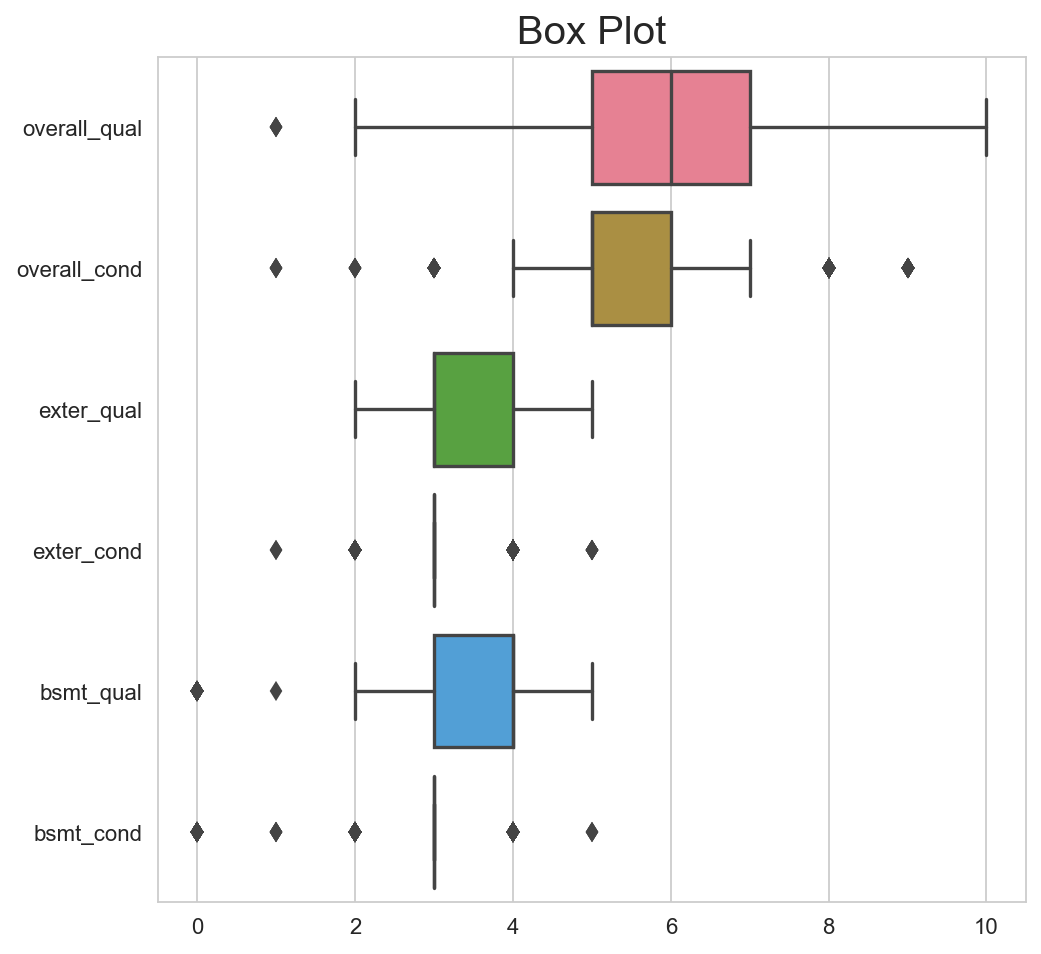

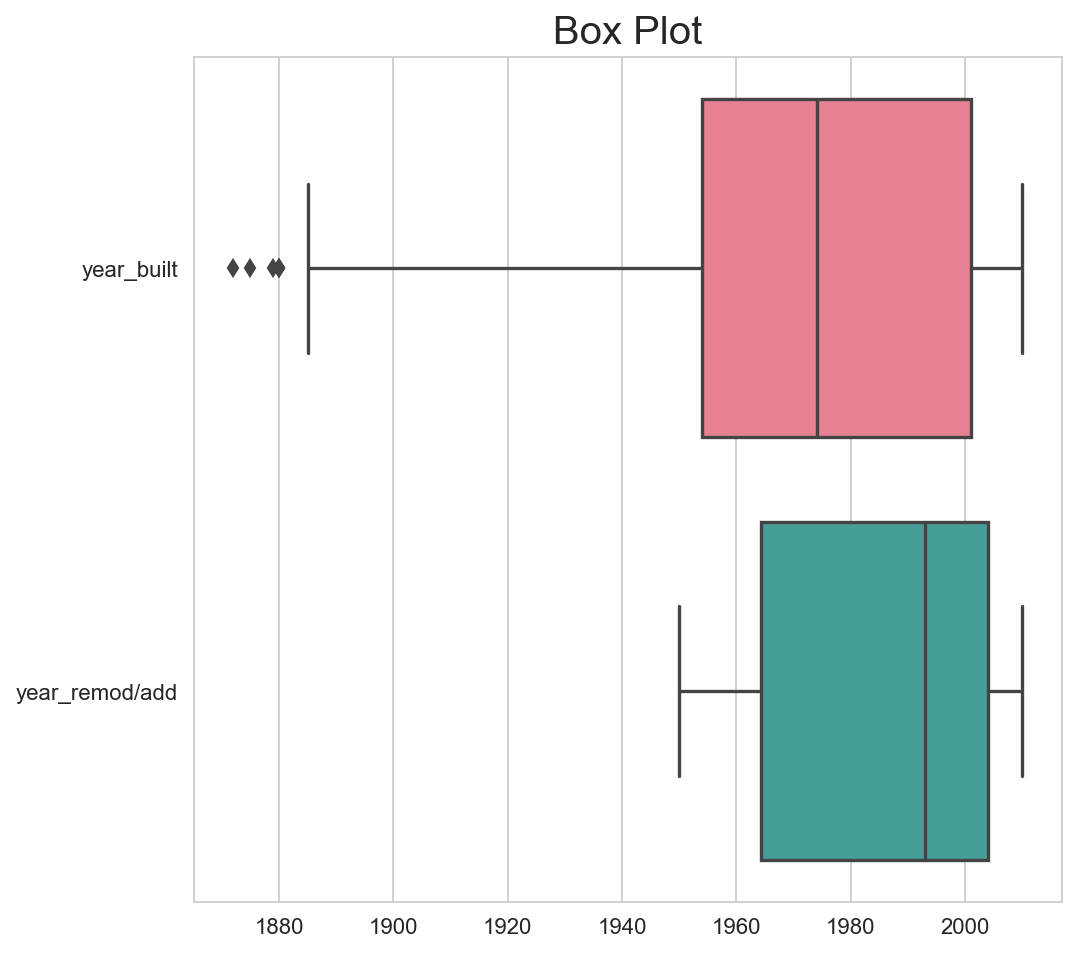

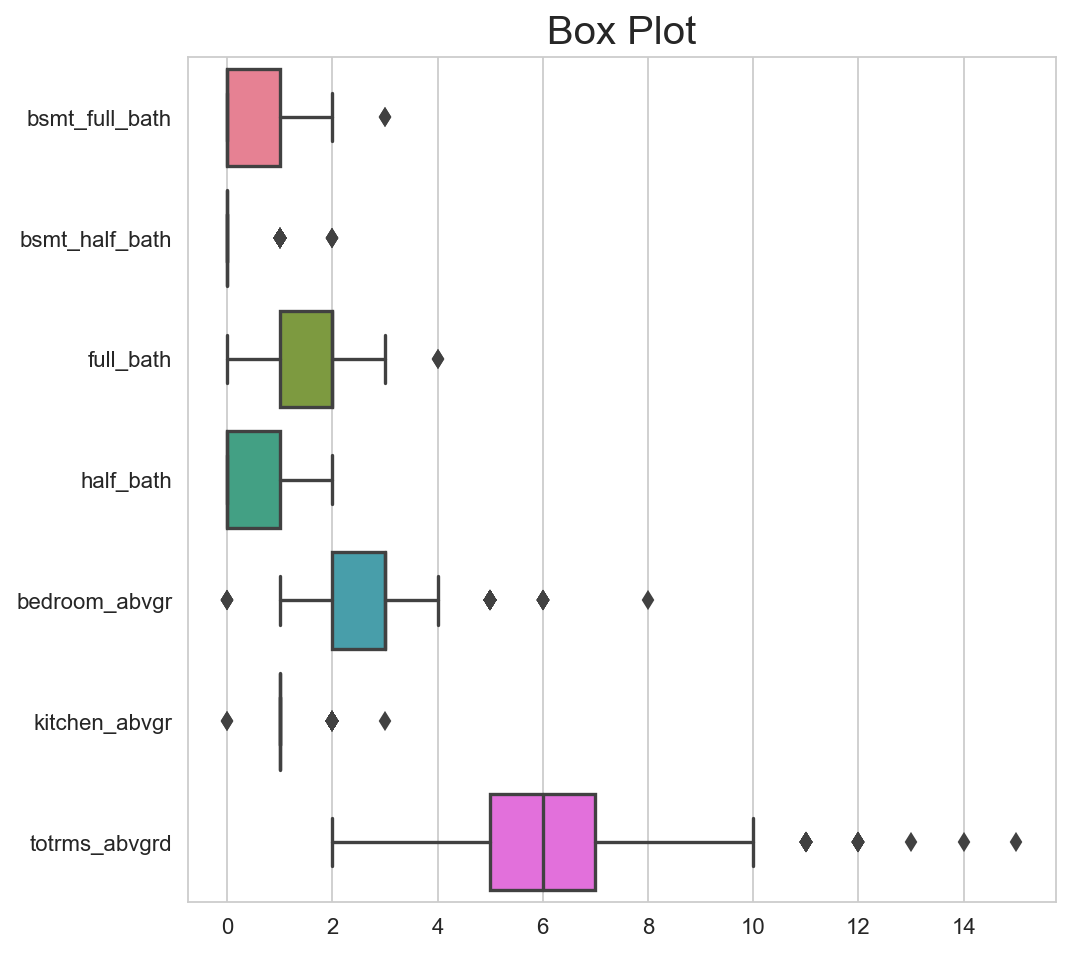

In [14]:
def plot_boxplot(train, list_of_columns, title):
    plt.figure(figsize=(7,7), dpi=80)
    sns.boxplot(data = train[list_of_columns], orient="h", palette = "husl")
    plt.title(title, fontsize=18);

plot_boxplot(train, ['overall_qual', 'overall_cond', 'exter_qual', 
        'exter_cond', 'bsmt_qual', 'bsmt_cond'], 
             'Box Plot')


plot_boxplot(train, ['year_built', 'year_remod/add'], 
             'Box Plot')


plot_boxplot(train, ['bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 
        'kitchen_abvgr', 'totrms_abvgrd'], 
             'Box Plot')

> The box plots demonstrate the outliers of different features to consider for the model. Although there are quite a few easily identifiable outliers, they represent what variability in real data can look like and therefore, can be left in the training model.

### Scatter Plots
- Displays scatter plots for numerical columns vs. saleprice using `sns.pairplot()`. These scatter plots will show the relationship between column and saleprice and, if there is a correlation, how strong the correlation is. 

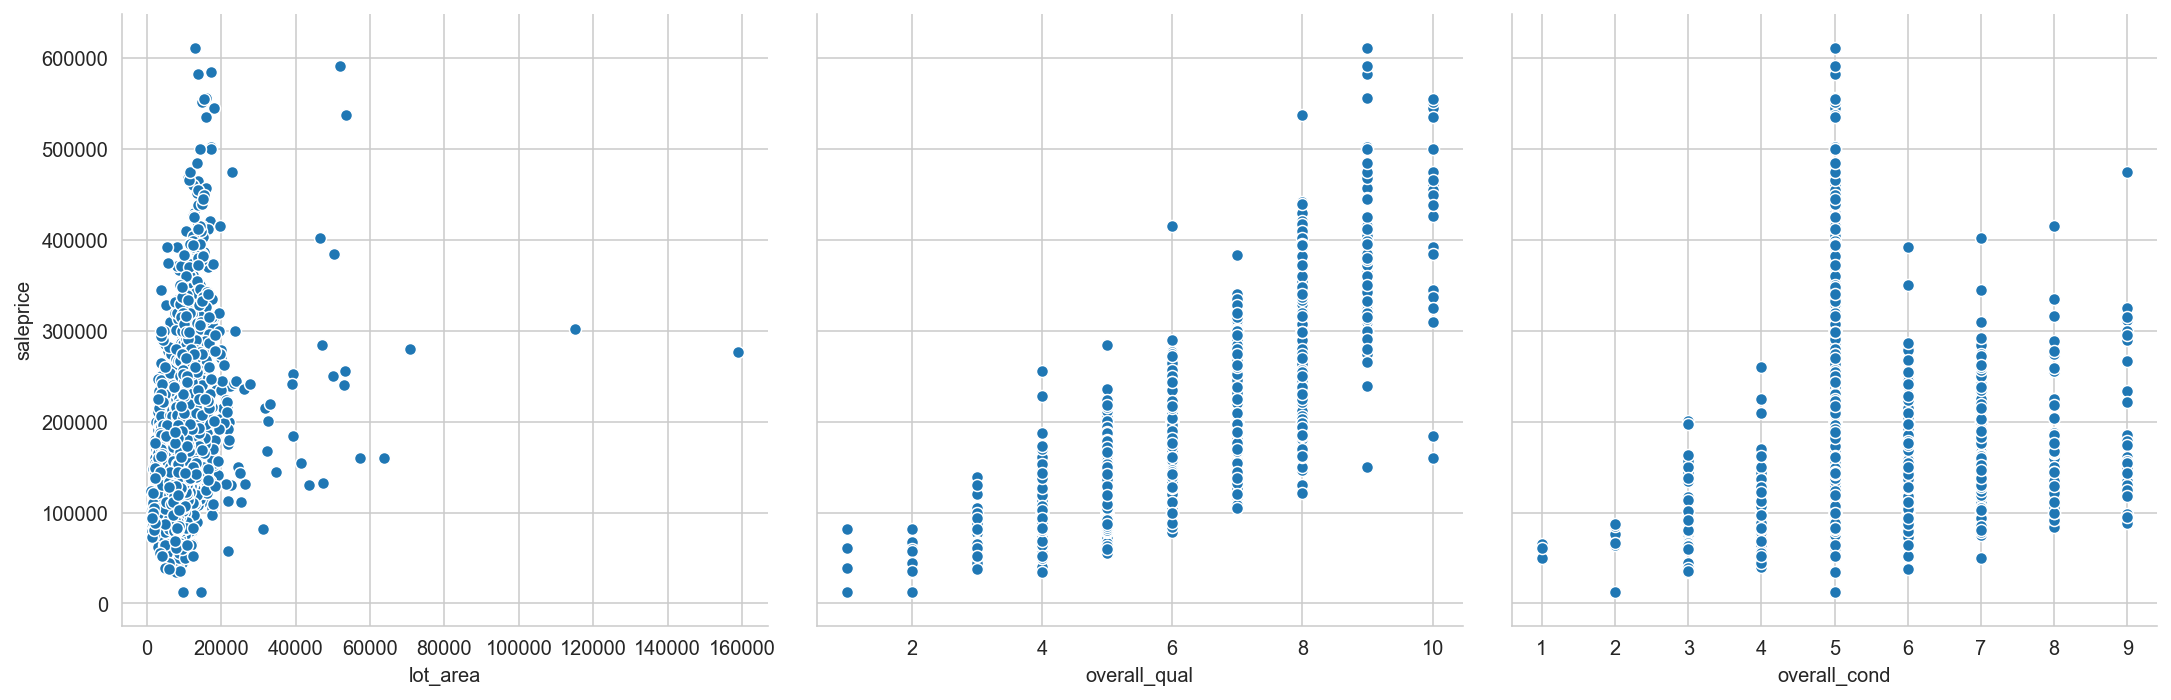

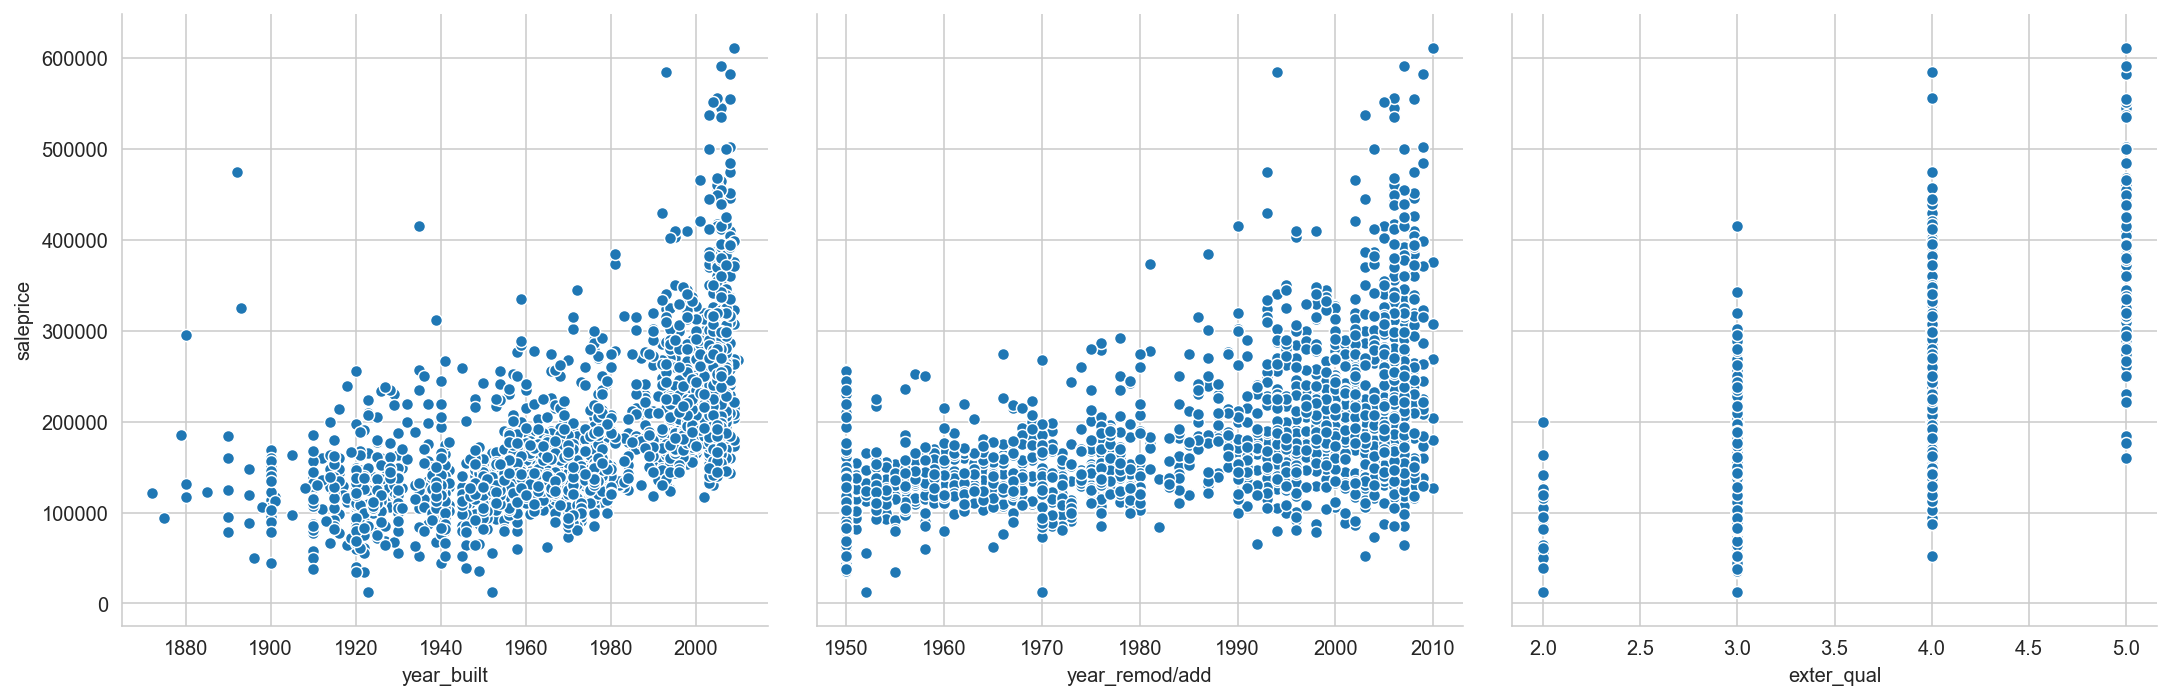

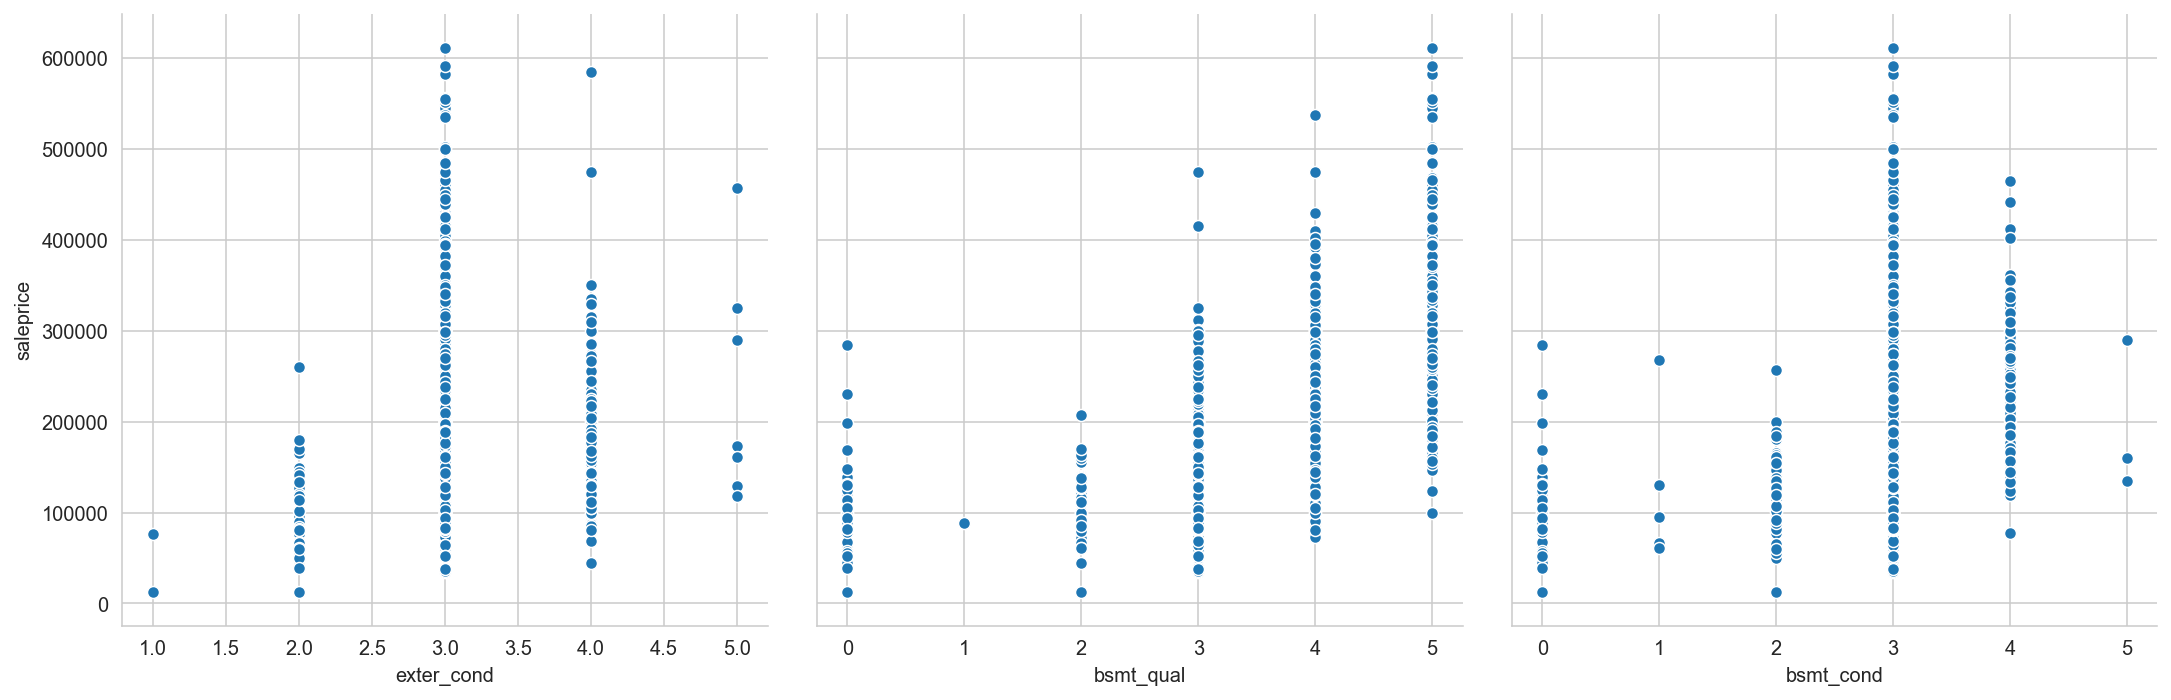

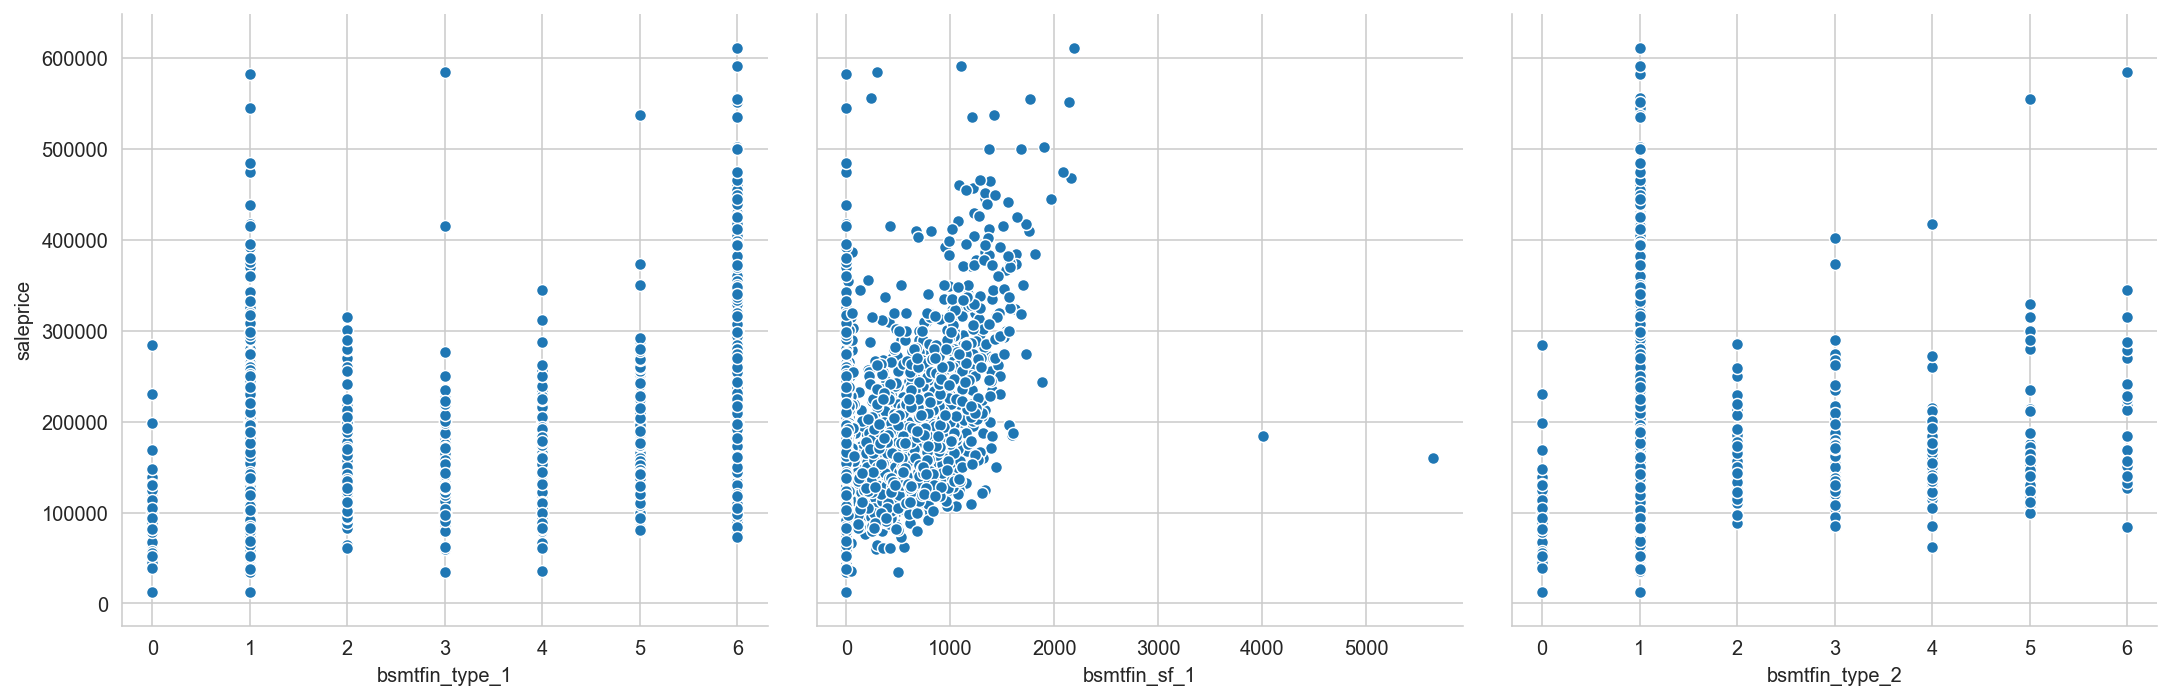

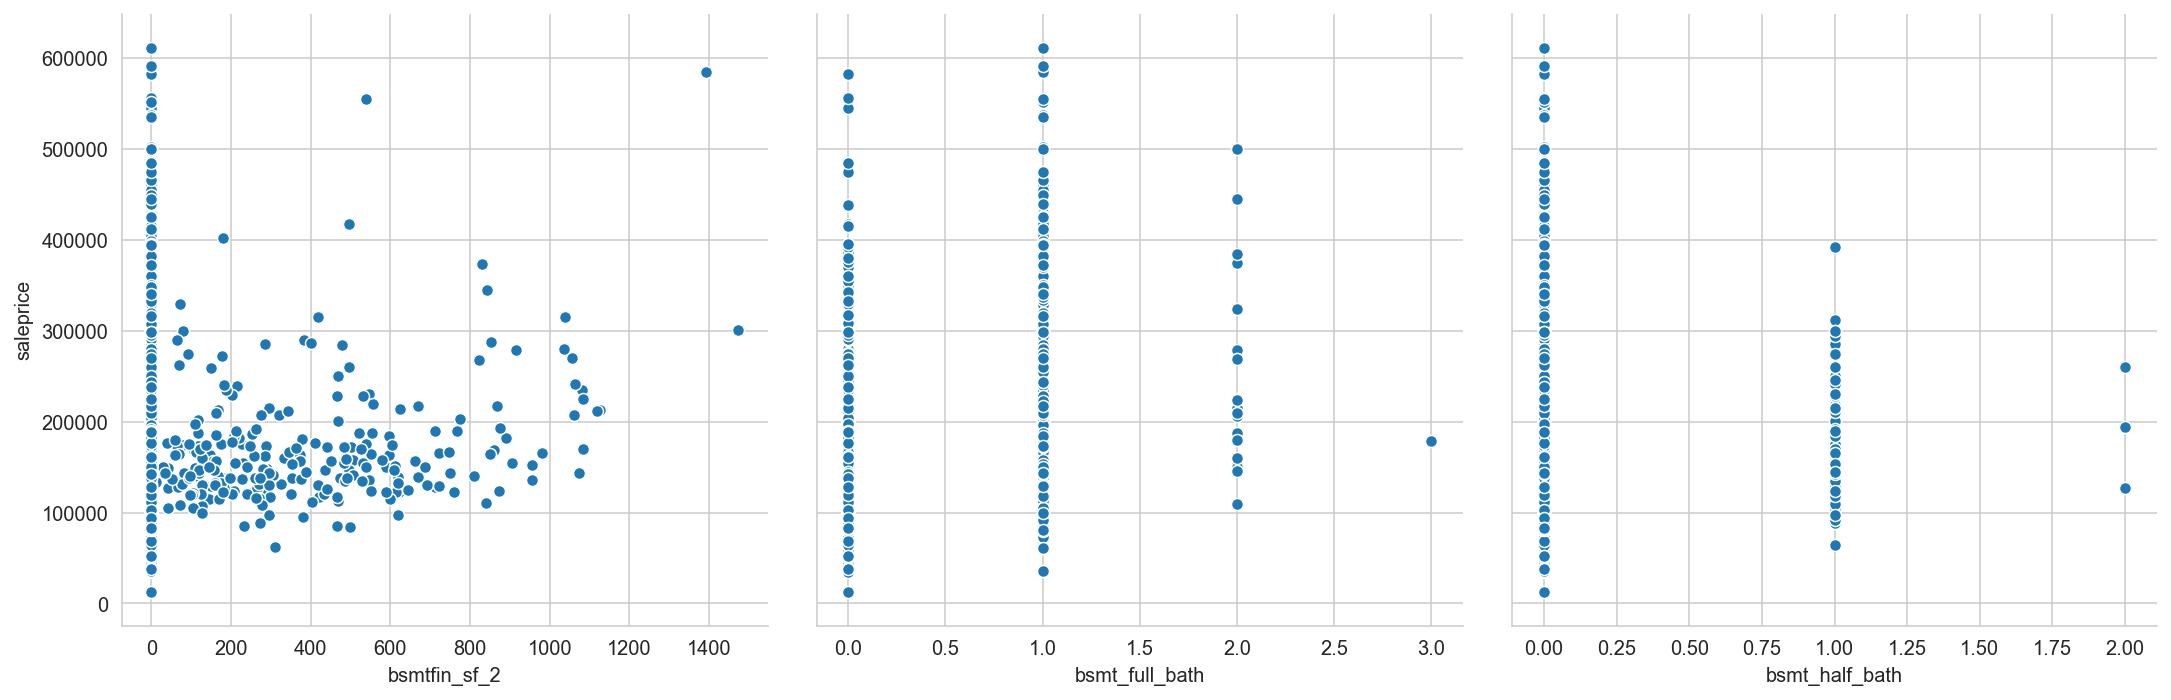

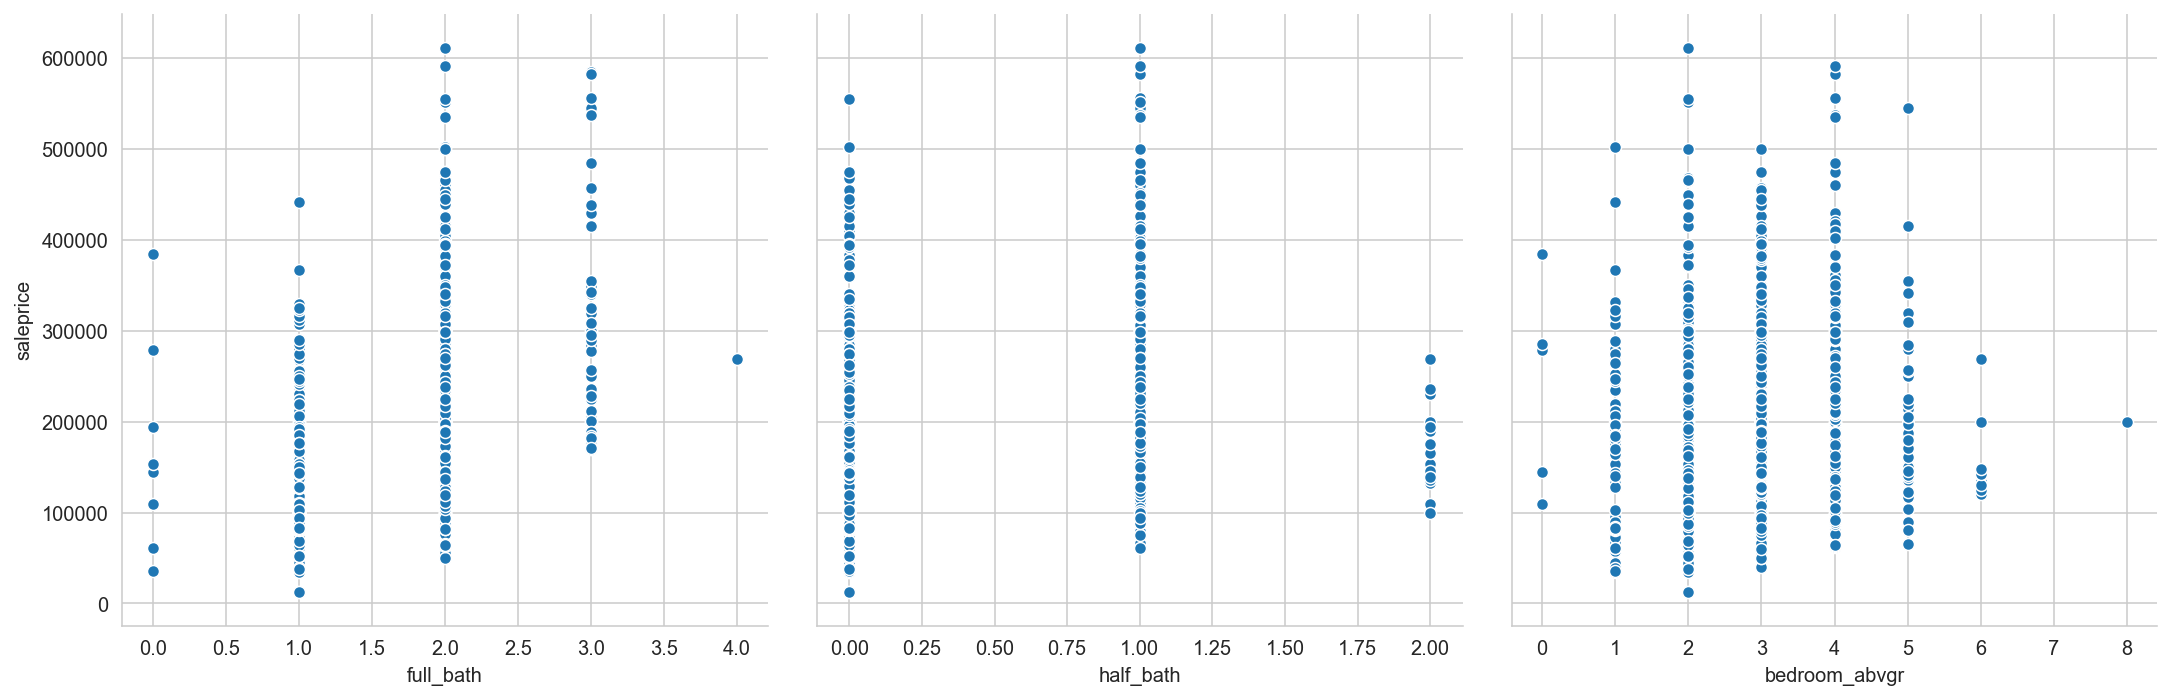

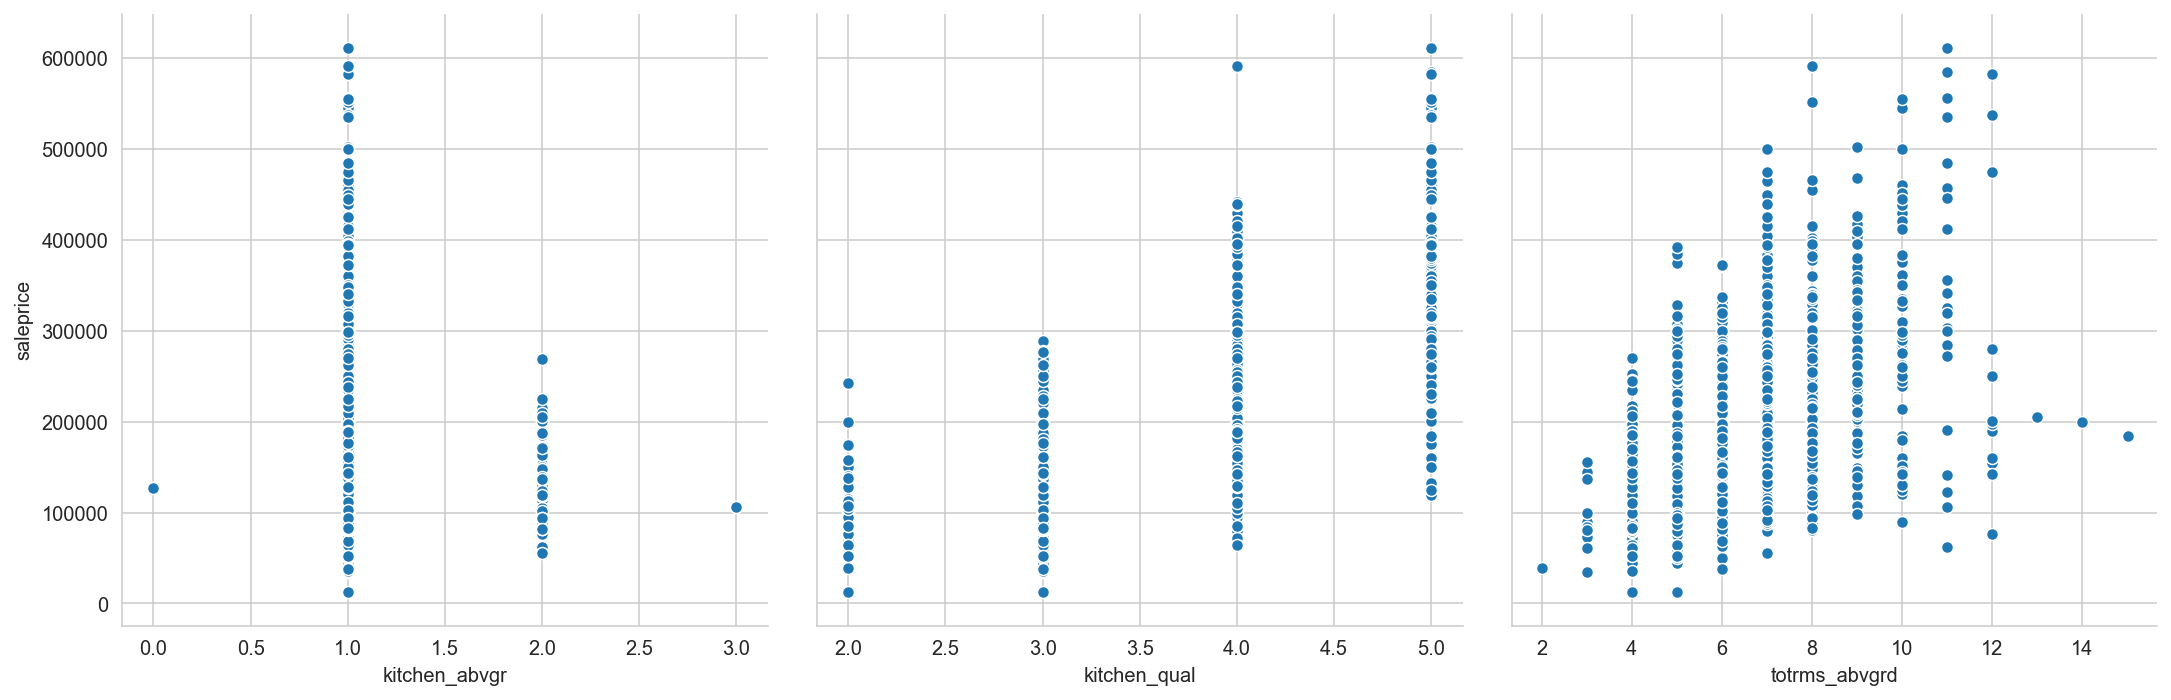

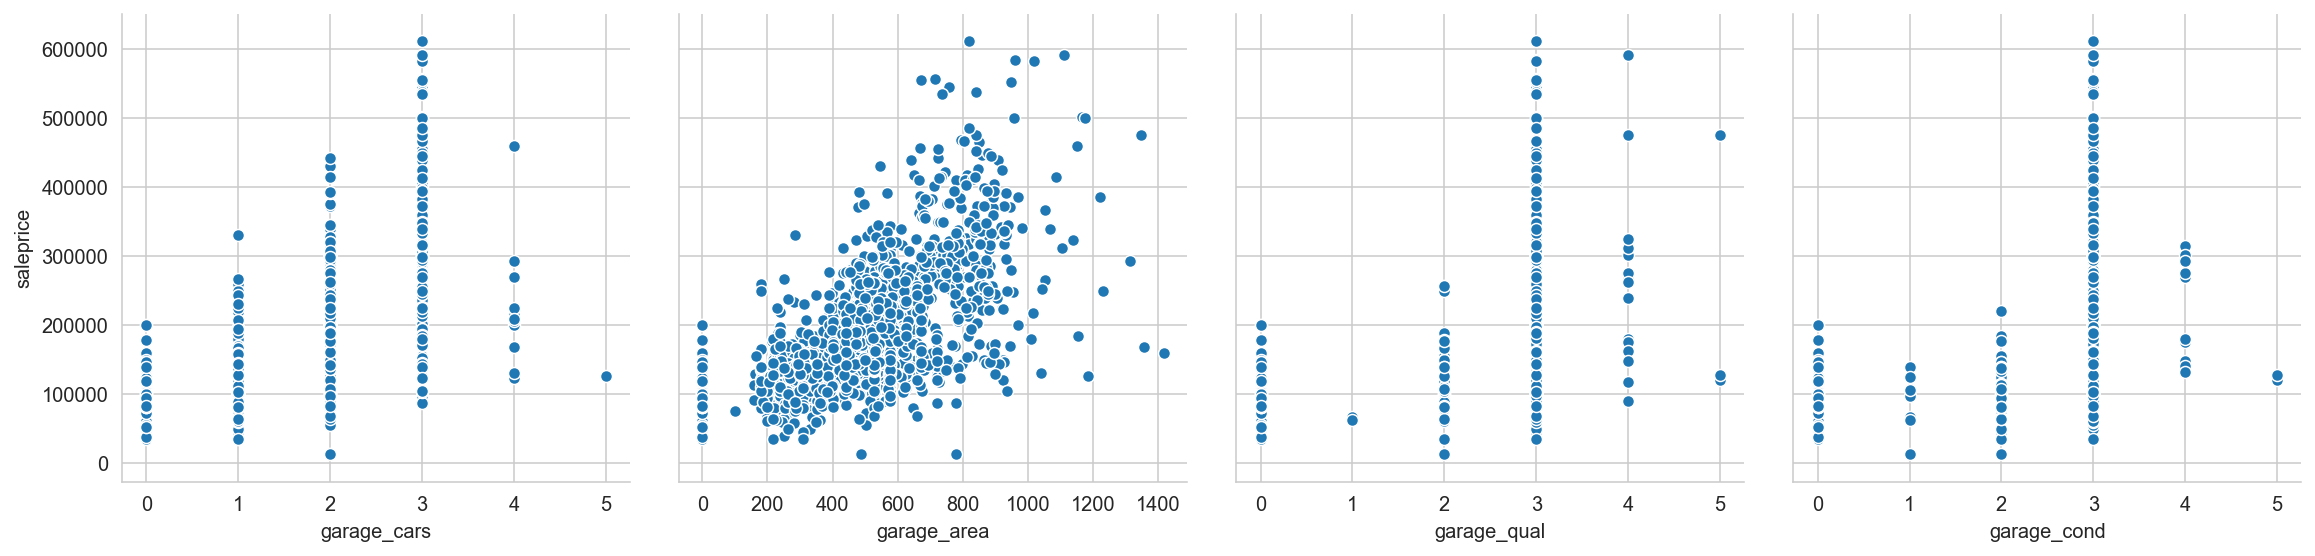

In [21]:
sns.pairplot(train, y_vars=['saleprice'], 
             x_vars=['lot_area', 'overall_qual', 'overall_cond',],
            height = 5, aspect=1,
            palette='hls')
plt.savefig('../images/scatter1.png');
plt.show()


sns.pairplot(train, y_vars=['saleprice'], 
             x_vars=['year_built', 'year_remod/add', 'exter_qual',],
            height = 5, aspect=1)
plt.savefig('../images/scatter2.png');
plt.show()


sns.pairplot(train, y_vars=['saleprice'], 
             x_vars=[ 'exter_cond', 'bsmt_qual', 'bsmt_cond',], 
             height = 5, aspect=1)
plt.savefig('../images/scatter3.png');
plt.show()


sns.pairplot(train, y_vars=['saleprice'], 
             x_vars=[ 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2'],
            height = 5, aspect=1)
plt.savefig('../images/scatter4.png');
plt.show()


sns.pairplot(train, y_vars=['saleprice'], 
             x_vars=['bsmtfin_sf_2', 'bsmt_full_bath', 'bsmt_half_bath'],
            height = 5, aspect=1)
plt.savefig('../images/scatter5.png');
plt.show()


sns.pairplot(train, y_vars=['saleprice'], 
             x_vars=['full_bath', 'half_bath', 'bedroom_abvgr',], 
            height = 5, aspect=1)
plt.savefig('../images/scatter6.png');
plt.show()


sns.pairplot(train, y_vars=['saleprice'], 
             x_vars=['kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd'], 
            height = 5, aspect=1)
plt.savefig('../images/scatter7.png');
plt.show()


sns.pairplot(train, y_vars=['saleprice'], 
             x_vars=['garage_cars', 'garage_area', 'garage_qual', 'garage_cond'], 
            height = 4, aspect=1)
plt.savefig('../images/scatter8.png');
plt.show();


>The stronger observed correlations are between `saleprice` and:
- `overall_qual`
- `year_built`
- `year_remod/add`
- `exter_qual`
- `bsmt_qual`
- `bsmt_cond`
- `bsmt_sf_1`
- `full_bath`
- `kitchen_qual`
- `totrms_abvgrd`
- `garage_cars`
- `garage_area`  

>Strong correlations are important to for identifying features in the linear regression model.

___
#### Testing out correlations with these "important" columns that may be good additions to my features list in my model.
- Make a correlation plot between sale price and the important columns

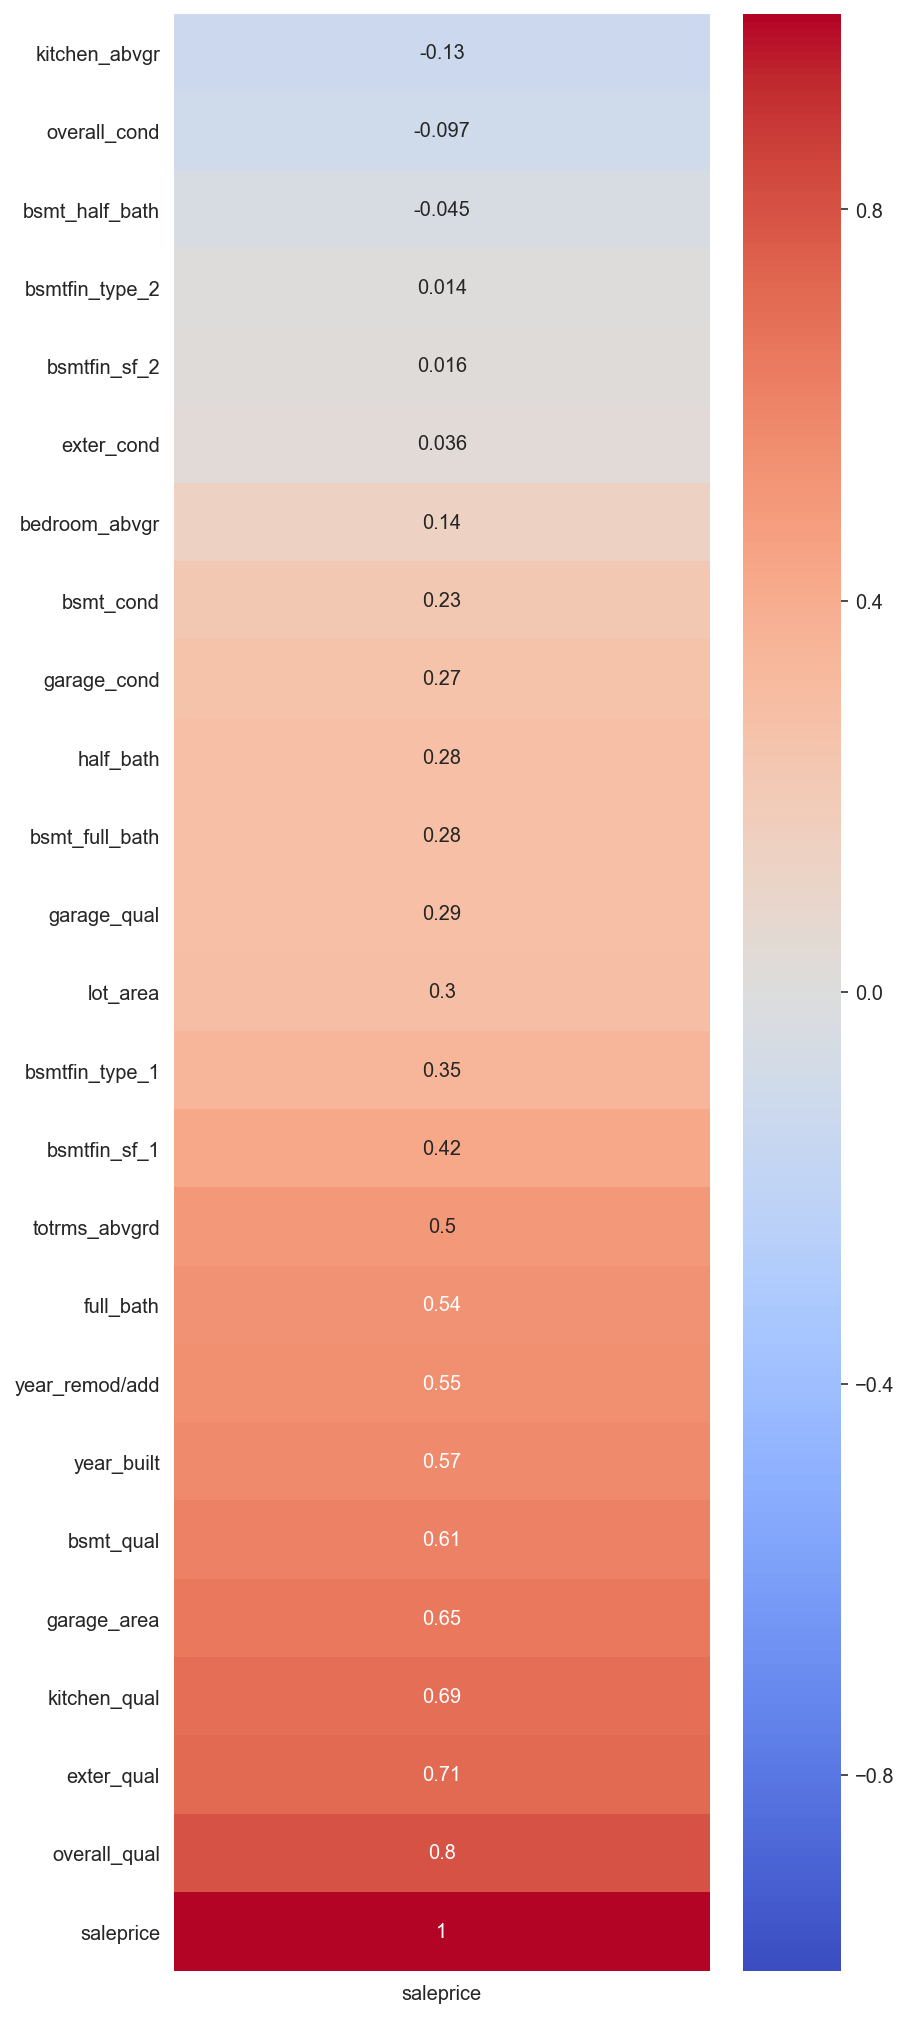

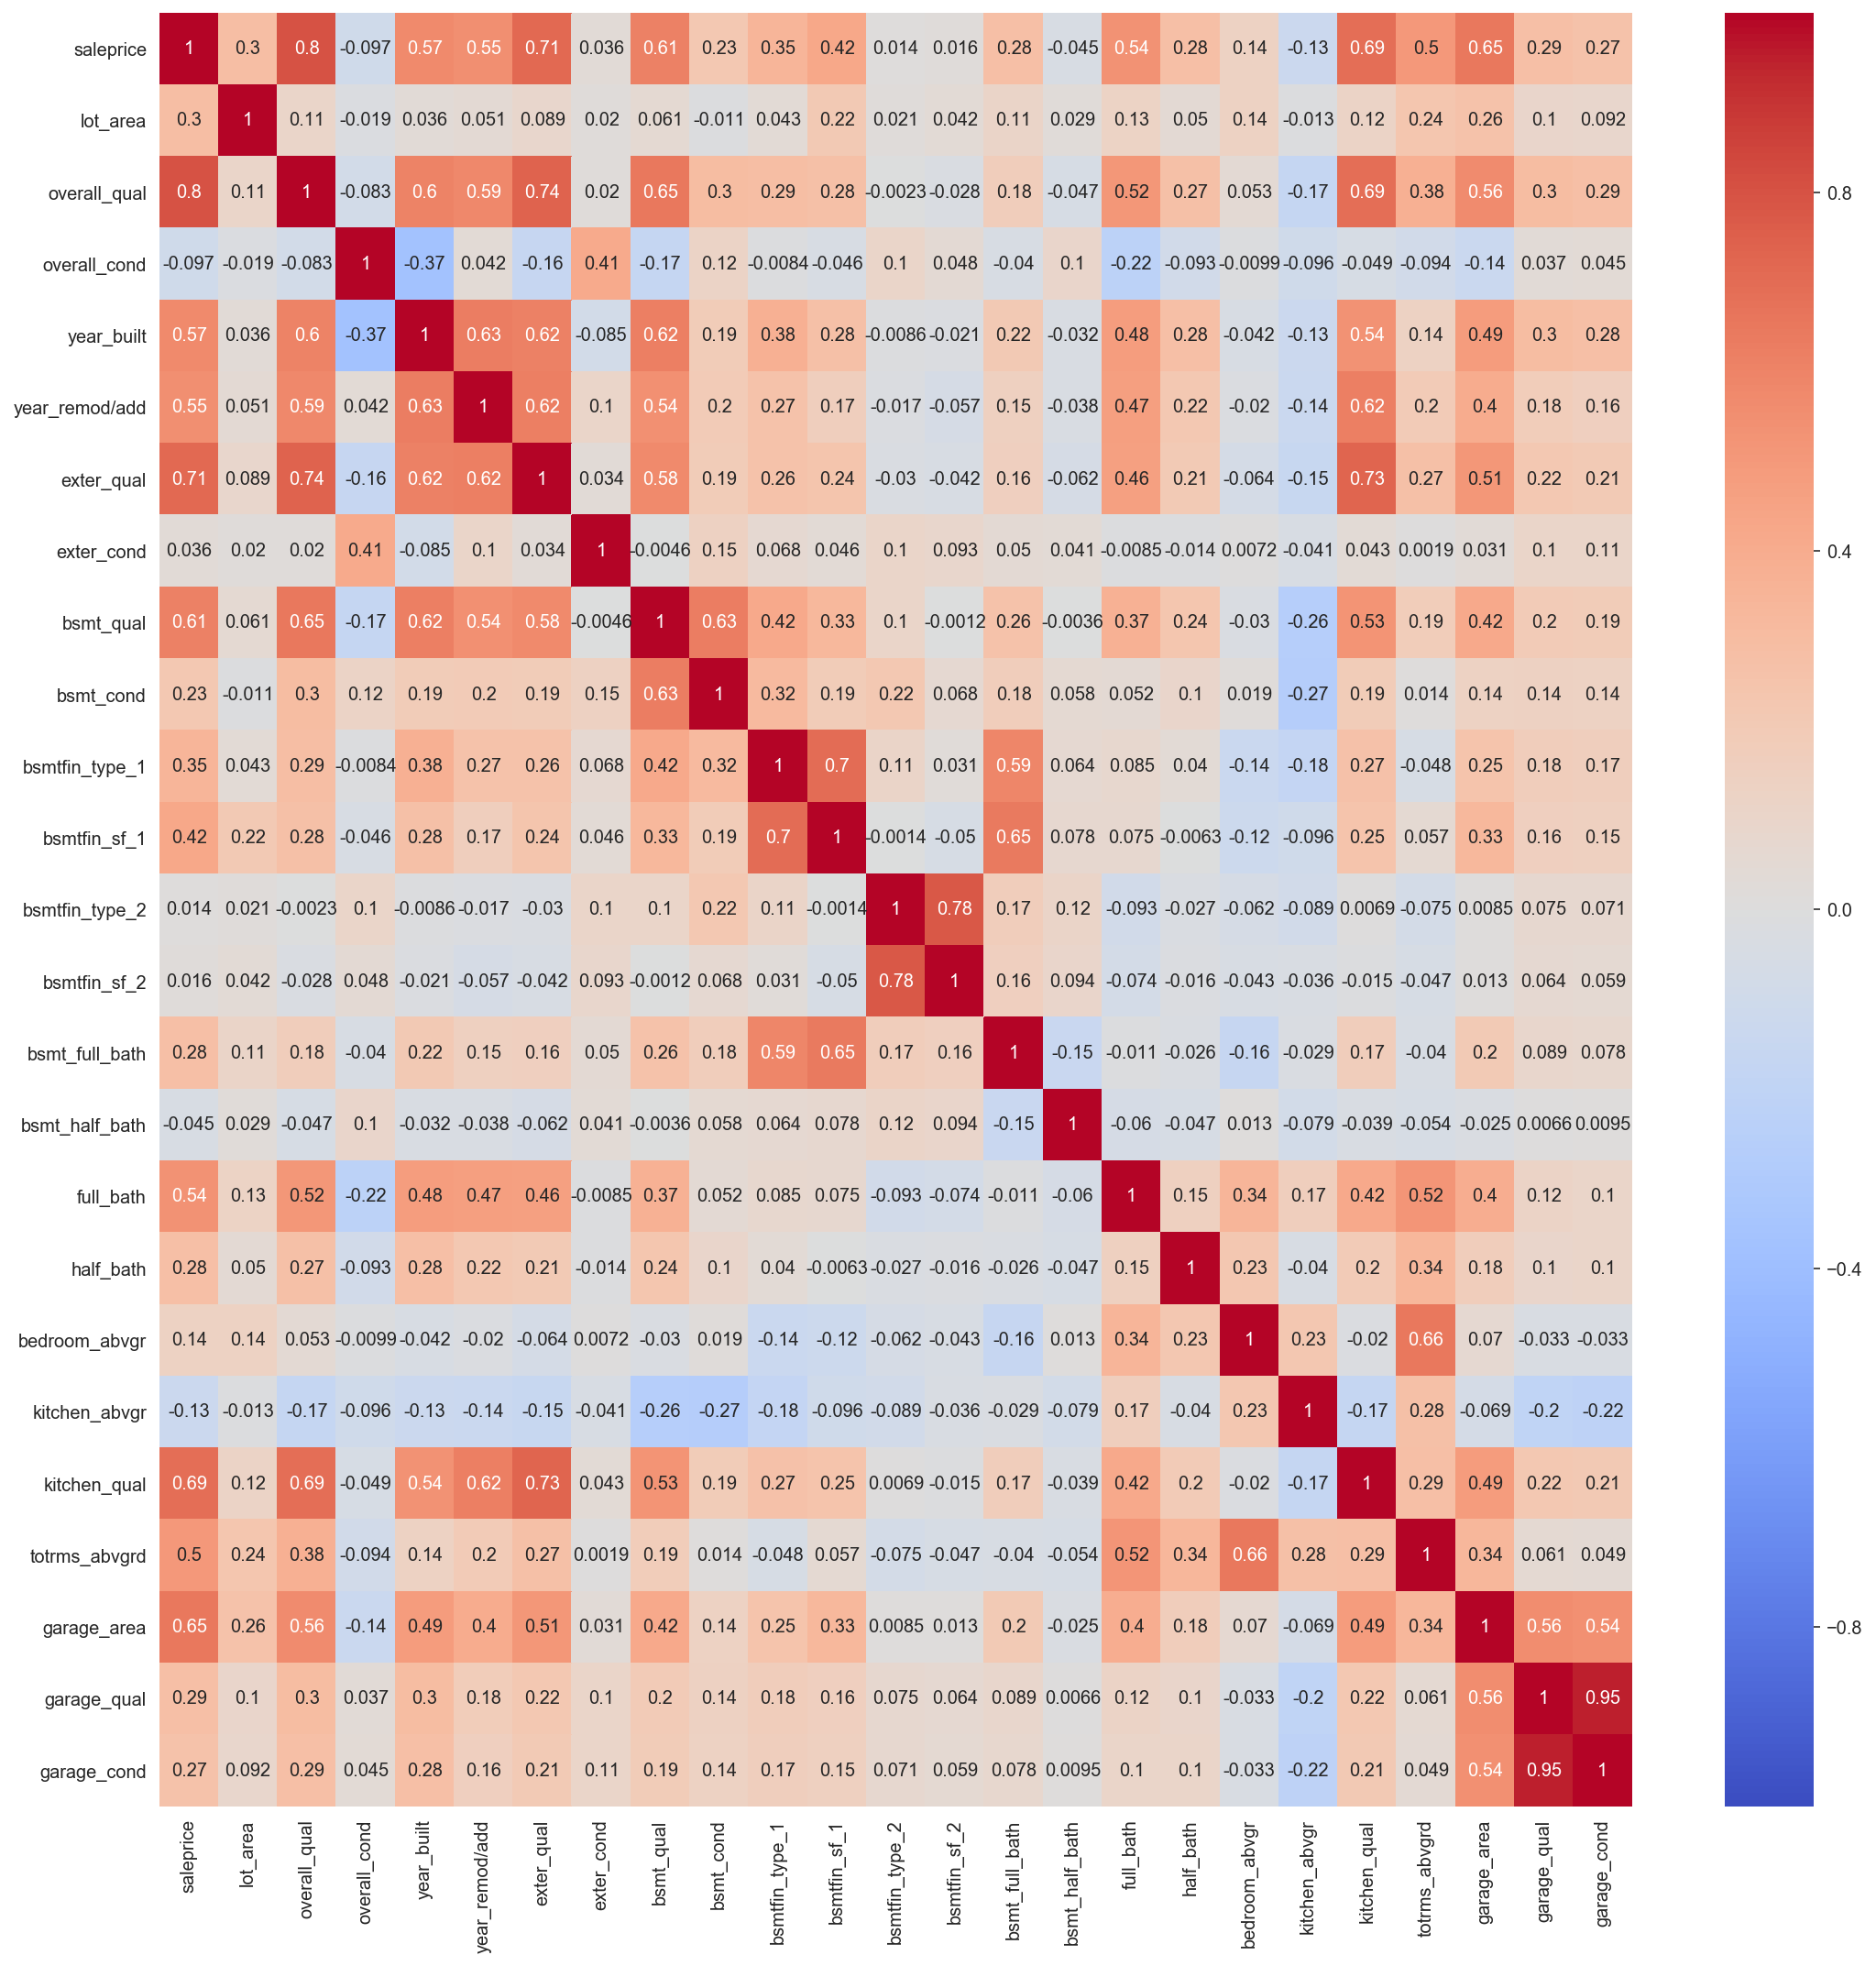

In [18]:
# Columns to test saleprice correlation on 
important_corr = ['saleprice', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'exter_qual', 
        'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 
        'bsmtfin_sf_2','bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 
        'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'garage_area', 'garage_qual', 'garage_cond']


saleprice_corr_important = train[important_corr].corr()[['saleprice']].sort_values('saleprice')

plt.figure(figsize = (6,18))
sns.heatmap(saleprice_corr_important,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)
# Source: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values
plt.savefig('../images/heatmap_saleprice_corr1.png');



plt.figure(figsize = (18,18))
sns.heatmap(train[important_corr].corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

# Source: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values
plt.savefig('../images/heatmap_saleprice_corr2.png');


Highest correlating variables:
- `overall_qual`
- `exter_qual`
- `kitchen_qual`
- `garage_area`
- `bsmt_qual`

### Choosing Features for Linear Regression Model

- Create a list with desirable features
- Append neighborhood dummy variables created to the `features` correlation list to represent the correlation between all potential features.

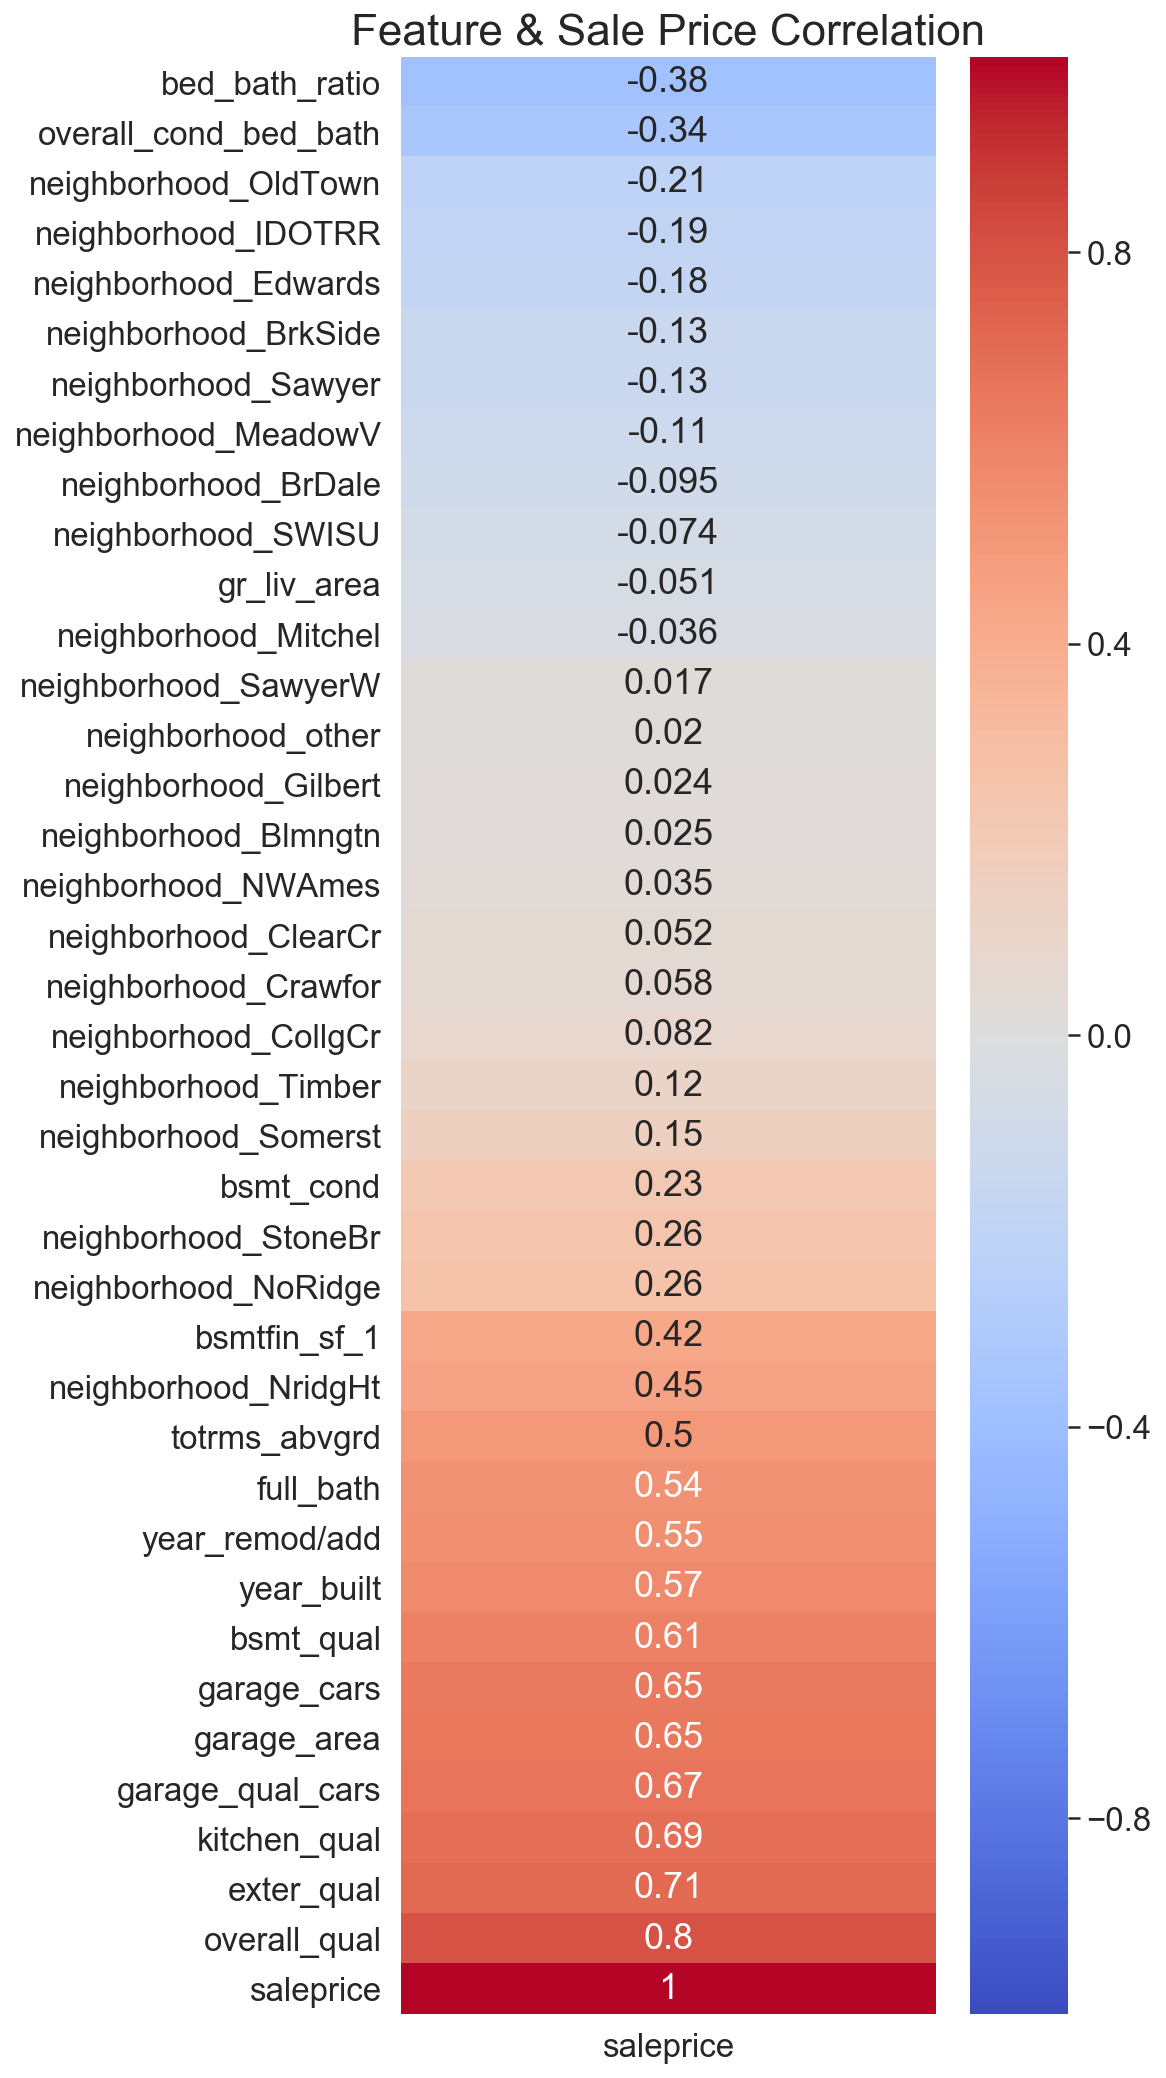

In [27]:
features_corr = ['overall_qual', 'year_built', 'year_remod/add', 'exter_qual', 'bsmt_qual', 'bed_bath_ratio',
            'bsmt_cond', 'bsmtfin_sf_1', 'full_bath', 'kitchen_qual', 'totrms_abvgrd', 'garage_cars', 
            'garage_area', 'garage_qual_cars', 'overall_cond_bed_bath', 'gr_liv_area', 'saleprice']

neighborhood_cols = [col for col in train.columns if 'neighborhood' in col]

features_corr.extend(neighborhood_cols)

saleprice_corr_feature = train[features_corr].corr()[['saleprice']].sort_values('saleprice')

plt.figure(figsize = (6,18))
sns.heatmap(saleprice_corr_feature,
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)
# Source: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values

plt.title('Feature & Sale Price Correlation', fontsize=22)
plt.savefig('../images/heatmap_saleprice_corr_feat.png');